# 简介
这是Yuchuan_Deng学习模式识别和python的作业汇总并进行了代码重构的版本，经过了三个版本的修改和迭代，加入了部分其他数据集的拓展测试与一些笔记内容。

## 本次参与测试的训练集包括
- mnist
- FasionMnist
- orl_face

## 简单介绍一下FasionMnist
0：T-shirt/top（T恤）
1：Trouser（裤子）
2：Pullover（套衫）
3：Dress（裙子）
4：Coat（外套）
5：Sandal（凉鞋）
6：Shirt（汗衫）
7：Sneaker（运动鞋）
8：Bag（包）
9：Ankle boot（踝靴）

## 本次测试最终划分出来的几个原始数据集
- mnist：mnist_train_image, mnist_train_label, mnist_test_image, mnist_test_label
- fasionmnist: fasionmnist_train_image, fasionmnist_train_label,fasionmnist_test_image, fasionmnist_test_label
- orl: face_train_image, face_train_label, face_test_image, face_test_label

# 导入包部分

In [1]:
# 外部依赖项
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn import metrics

In [2]:
# 定义一个偏差常量
EPS = 1E-8

# 数据读取部分

## 实现函数

In [3]:

import struct
# 读取MNIST与Fasion_Mnist的函数
## 读取图片部分
def mnist_load_images(file_name):
    # 在读取或写入一个文件之前，你必须使用 Python 内置open()函数来打开它。
    # file object = open(file_name [, access_mode][, buffering])
    # file_name是包含您要访问的文件名的字符串值。                         ##
    # access_mode指定该文件已被打开，即读，写，追加等方式。               ##
    # 0表示不使用缓冲，1表示在访问一个文件时进行缓冲。                    ##
    # 这里rb表示只能以二进制读取的方式打开一个文件                        
    binfile = open(file_name, 'rb')
    ##   从一个打开的文件读取数据
    buffers = binfile.read()
    ##   读取image文件前4个整型数字
    magic, num, rows, cols = struct.unpack_from('>IIII', buffers, 0)
    ##   整个images数据大小为60000*28*28
    bits = num * rows * cols
    ##   读取images数据
    images = struct.unpack_from('>' + str(bits) + 'B', buffers, struct.calcsize('>IIII'))
    ##   关闭文件
    binfile.close()
    ##   转换为[60000,784]型数组
    images = np.reshape(images, [num, rows * cols])
    return images

## 读取标记部分
def mnist_load_labels(file_name):
    ## 打开文件
    binfile = open(file_name, 'rb')
    ##   从一个打开的文件读取数据
    buffers = binfile.read()
    ##   读取label文件前2个整形数字，label的长度为num
    magic, num = struct.unpack_from('>II', buffers, 0)
    ##   读取labels数据
    labels = struct.unpack_from('>' + str(num) + "B", buffers, struct.calcsize('>II'))
    ##   关闭文件
    binfile.close()
    ##   转换为一维数组
    labels = np.reshape(labels, [num])
    return labels

def load_minst():
    mnist_train_image, mnist_train_label = mnist_load_images("dataset/mnist_dataset/train-images.idx3-ubyte"), \
                       mnist_load_labels("dataset/mnist_dataset/train-labels.idx1-ubyte")
    mnist_test_image, mnist_test_label = mnist_load_images("dataset/mnist_dataset/t10k-images.idx3-ubyte"), \
                     mnist_load_labels("dataset/mnist_dataset/t10k-labels.idx1-ubyte")

    return mnist_train_image, mnist_train_label, mnist_test_image, mnist_test_label

def load_fasionminst():
    fasionmnist_train_image, fasionmnist_train_label = mnist_load_images("dataset/fasionmnist_dataset/train-images-idx3-ubyte"), \
                       mnist_load_labels("dataset/fasionmnist_dataset/train-labels-idx1-ubyte")
    fasionmnist_test_image, fasionmnist_test_label = mnist_load_images("dataset/fasionmnist_dataset/t10k-images-idx3-ubyte"), \
                     mnist_load_labels("dataset/fasionmnist_dataset/t10k-labels-idx1-ubyte")
    
    return fasionmnist_train_image, fasionmnist_train_label,fasionmnist_test_image, fasionmnist_test_label

# 读取ORL的函数
from PIL import Image
def handle_data():
        # 标签列添加到矩阵的最后一列
        label_list = []
        # 将每一行的特征向量进行堆叠,最后得到(400,10305)大小的二维特征矩阵
        stack_matrix = np.array([[0]])
        for i in range(1, 41):
            # 加入每张图片的标签
            label_list.append(i)
            class_matrix = np.array(label_list, ndmin=2)
            for j in range(1, 11):
                path = 'dataset/ORL_Faces/s{}/{}.pgm'.format(i, j)
                x = Image.open(path)
                # 转换为narray的结构，并转为二维矩阵
                data = np.reshape(np.asarray(x), (1, -1))
                # print(x_data.shape)  # 得到的维度是(1, 10304)
                one_data = np.column_stack((data, class_matrix))
                # 第一次不合并
                if i == 1 and j == 1:
                    stack_matrix = one_data
                    continue
                stack_matrix = np.row_stack((stack_matrix, one_data))

            label_list.pop()
        np.savetxt('orldata.txt', stack_matrix)

from sklearn.model_selection import train_test_split
def ORL_load_data():
        file = 'orldata.txt'
        # 读入处理后的图片二维矩阵文件
        train_data = np.loadtxt('orldata.txt')
        data = train_data[:, :10304]  # 取出特征数据
        target = train_data[:, -1]  # 取出标签数据
        face_train_image, face_test_image, face_train_label, face_test_label = train_test_split(data, target,
                                                                test_size=0.3)
        return face_train_image, face_test_image, face_train_label, face_test_label


在机器学习中，我们应该通过在不同的数据集上进行训练和测试来评估我们的模型。`train_test_split` 是一个用于将数据拆分为两个独立数据集的效用函数。`stratify`参数可强制将训练和测试数据集的类分布与整个数据集的类分布相同。

In [4]:
mnist_train_image, mnist_train_label, mnist_test_image, mnist_test_label = load_minst()

fasionmnist_train_image, fasionmnist_train_label,fasionmnist_test_image, fasionmnist_test_label=load_fasionminst()

handle_data()
face_train_image, face_test_image, face_train_label, face_test_label =ORL_load_data()
       

## 抽取zoom不2后的成分（取5和8）

In [5]:
def get_58(X, Y):
    Y=Y.reshape((-1, 1))
    dataset = np.concatenate([X, Y], axis=1)
    dataset_5 = dataset[dataset[:, -1] == 5]
    dataset_8 = dataset[dataset[:, -1] == 8]
    dataset_5[:, -1] = -1.0
    dataset_8[:, -1] = 1.0

    data = np.concatenate([dataset_5, dataset_8], axis=0)#两个数组的拼接
    np.random.shuffle(data)
    return data[:, :-1], data[:, -1]

# mnist
mnist_train_58image, mnist_train_58label = get_58(mnist_train_image, mnist_train_label)
mnist_test_58image, mnist_test_58label = get_58(mnist_test_image, mnist_test_label)

#fasionmnist
fasionmnist_train_58image, fasionmnist_train_58label = get_58(fasionmnist_train_image, fasionmnist_train_label)
fasionmnist_test_58image, fasionmnist_test_58label =  get_58(fasionmnist_test_image, fasionmnist_test_label)



## 简单看一看数据的分布吧

D:\Software\Anoconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

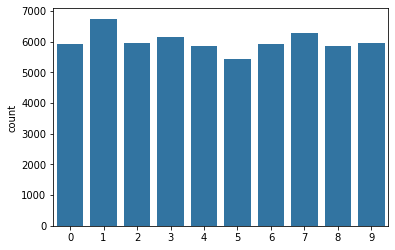

In [6]:
# mnist
import seaborn as sns
sns.countplot(mnist_train_label, color = sns.color_palette()[0])


D:\Software\Anoconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

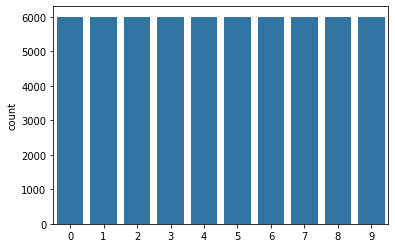

In [7]:
# fasionmnist

sns.countplot(fasionmnist_train_label, color = sns.color_palette()[0])

D:\Software\Anoconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

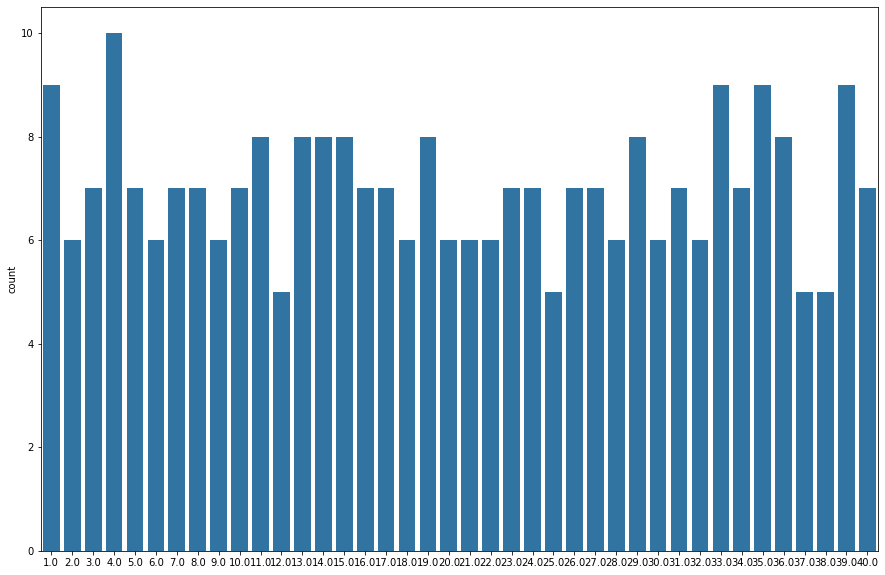

In [8]:
#orl
plt.figure(figsize=(15, 10))
sns.countplot(face_train_label, color = sns.color_palette()[0])

## 可视化看看

The digit in the image is [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0 222 254 254 254
 254 241 198 198 198 198 

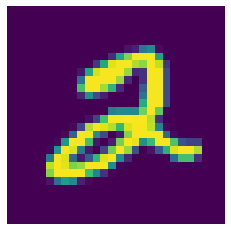

In [9]:
# mnist
plt.imshow(mnist_train_image[5].reshape(28,28))
plt.axis('off')# 关闭坐标轴
print('The digit in the image is {}'.format(mnist_test_image[0]))# 格式化打印

The digit in the image is [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   3
   1   0   0   7   0  37   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   1   2   0 

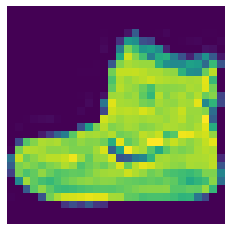

In [10]:
# mnist
plt.imshow(fasionmnist_train_image[0].reshape(28, 28))
plt.axis('off')# 关闭坐标轴
print('The digit in the image is {}'.format(fasionmnist_test_image[0]))# 格式化打印

(-0.5, 91.5, 111.5, -0.5)

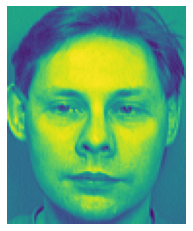

In [11]:
plt.imshow(face_train_image[0].reshape(112, 92))
plt.axis('off')# 关闭坐标轴

# 实验用到的模型部分
`scikit-learn`提供了三个函数：`cross_val_score`，`cross_val_predict`和`cross_validate`。 后者提供了有关拟合时间，训练和测试分数的更多信息。 
为了配合相关的接口，我们先定义一个模型的抽象类别

In [12]:
from abc import abstractmethod
class Model:
    loss_saver = []

    @abstractmethod
    def fit(self, X, y):
        pass

    @abstractmethod
    def predict(self, X):
        pass

## 感知机相关部分

首先为了配合sklearn的接口，我先阅读了一部分sklearn的源码.
``Perceptron()`` is equivalent to `SGDClassifier(loss="perceptron",eta0=1, learning_rate="constant", penalty=None)`.
eta0：Constant by which the updates are multiplied.

In [13]:
from tqdm import tqdm, trange

class Perceptron(Model):
    # 模型定义
    def __init__(self, alpha=0.03, n_iter=20):
        self.alpha = alpha #学习率
        self.n_iter = n_iter #迭代次数
        self.loss_saver = [] #损失收集

    # 模型训练
    def fit(self, X, Y):
        m, n = np.shape(X)
        self.bias = 0
        self.W = np.ones(n)

        for i in tqdm(range(self.n_iter)):
            for x, y in zip(X, Y):
                y_hat = np.dot(x, self.W) + self.bias

                if y * y_hat < 0.:
                    self.W += x * self.alpha * y
                    self.bias += self.alpha * y

            self.loss_saver.append(self.loss(X, Y))

            if self.loss(X, Y) < EPS:
                return

    def predict(self, X):
        return np.dot(X, self.W) + self.bias

    def loss(self, X, Y):
        return metrics.accuracy_score(Y, np.sign(self.predict(X)))

## MSE

In [14]:
from scipy import linalg
class MSE(Model):
    def __init__(self, c=0.03, n_iter=20):
        self.c = c
        self.n_iter = n_iter
        self.loss_saver = []

    def fit(self, X, Y):
        m, n = X.shape
        b = np.ones((m, 1))
        X = np.concatenate([X, b], axis=1)
        Y = Y.reshape((-1, 1))
        X = X * Y

        self.b = np.ones(m, dtype=np.float)
        X_shape = linalg.pinv(X)

        for i in trange(self.n_iter):
            self.W = np.dot(X_shape, self.b)
            self.err = np.dot(X, self.W) - self.b
            self.b = self.b + self.c * (self.err + np.abs(self.err))
            self.loss_saver.append(np.linalg.norm(self.err, ord=2))
            if self.loss_saver[-1] < EPS:
                return

    def predict(self, X):
        b = np.ones((X.shape[0], 1))
        X = np.concatenate([X, b], axis=1)
        return np.dot(X, self.W)

## Fisher

In [15]:
from scipy import linalg
class Fisher(Model):
    def __init__(self, iter_n = 10):
        self.c = 0.
        self.iter_n = iter_n
        self.loss_saver = []

    @staticmethod
    def _cal_cov_avg(X):
        u = np.mean(X, axis=0)
        cov = np.cov(X, rowvar=False)

        return cov, u

    def fit(self, X, Y):
        Y = Y.reshape((-1, 1))
        X = X / 255
        X_full = np.concatenate([X, Y], axis=1)
        X_0 = X_full[X_full[:, -1] == -1]
        X_1 = X_full[X_full[:, -1] == 1]
        X_0, X_1 = X_0[:, :-1], X_1[:, :-1]
        cov_0, u_0 = self._cal_cov_avg(X_0)
        cov_1, u_1 = self._cal_cov_avg(X_1)

        s_w = cov_0 + cov_1
        s_w_inv = linalg.pinv(s_w)
        self.W = np.dot(s_w_inv, u_0 - u_1)
        self.u_0 = np.dot(u_0, self.W)
        self.u_1 = np.dot(u_1, self.W)
        acc = 0.
        c = 0.

        for i in trange(self.iter_n):
            self.c = i / self.iter_n
            l_acc = self.loss(X * 255, Y)
            self.loss_saver.append(l_acc)
            if l_acc > acc:
                c = self.c
                acc = l_acc

        self.c = c

    def loss(self, X, Y):
        return metrics.accuracy_score(Y, np.sign(self.predict(X)))

    def predict(self, X):
        X = X / 255
        return -(np.dot(X, self.W) - (self.u_0 + (self.u_1 - self.u_0) * self.c))

## OVR（内核Fisher）

In [16]:
class OVR(Model):
    def __init__(self, model, n_class):
        self.model = model
        self.n_class = n_class
        
        self.models = []

        for i in range(n_class):
            self.models.append(model())

    def fit(self, X, Y):
        Y = Y.reshape((-1, 1))
        X_full = np.concatenate([X, Y], axis=1)

        for i in range(self.n_class):
            X_o = X_full[X_full[:, -1] == i].copy()
            X_r = X_full[X_full[:, -1] != i].copy()
            
            X_o, X_r = X_o[:, :-1], X_r[:, :-1]
            Y_o, Y_r = np.ones((X_o.shape[0], 1)), -np.ones((X_r.shape[0], 1))
            tmp_data_o = np.concatenate([X_o, Y_o], axis=1)
            tmp_data_r = np.concatenate([X_r, Y_r], axis=1)
            tmp_data = np.concatenate([tmp_data_r, tmp_data_o], axis=0)
            np.random.shuffle(tmp_data)
            tmp_X, tmp_Y = tmp_data[:, :-1], tmp_data[:, -1]
            self.models[i].fit(tmp_X, tmp_Y)

    def predict(self, X):
        n = X.shape[0]
        res, maxx = np.zeros(n), np.zeros(n)

        for i in range(self.n_class):
            tmp_res = self.models[i].predict(X)

            for j in range(n):
                if tmp_res[j] > maxx[j]:
                    res[j], maxx[j] = i, tmp_res[j]

        return res

## SVM

In [17]:
from tqdm import trange

class SVM:
    def __init__(self, n_iter=100, kernel='linear'):
        self.max_iter = n_iter
        self._kernel = kernel

    def init_args(self, features, labels):
        self.m, self.n = features.shape
        self.X = features
        self.Y = labels
        self.b = 0.0

        self.alpha = np.ones(self.m)
        self.E = [self._E(i) for i in range(self.m)]
        self.C = 1.0

    def _KKT(self, i):
        y_g = self._g(i) * self.Y[i]
        if self.alpha[i] == 0:
            return y_g >= 1
        elif 0 < self.alpha[i] < self.C:
            return y_g == 1
        else:
            return y_g <= 1

    def _g(self, i):
        r = self.b
        for j in trange(self.m):
            r += self.alpha[j] * self.Y[j] * self.kernel(self.X[i], self.X[j])
        return r

    def kernel(self, x1, x2):
        if self._kernel == 'linear':
            return sum([x1[k] * x2[k] for k in range(self.n)])
        elif self._kernel == 'poly':
            return (sum([x1[k] * x2[k] for k in range(self.n)]) + 1)**2

        return 0

    def _E(self, i):
        return self._g(i) - self.Y[i]

    def _init_alpha(self):
        index_list = [i for i in range(self.m) if 0 < self.alpha[i] < self.C]
        non_satisfy_list = [i for i in range(self.m) if i not in index_list]
        index_list.extend(non_satisfy_list)

        for i in index_list:
            if self._KKT(i):
                continue

            E1 = self.E[i]
            if E1 >= 0:
                j = min(range(self.m), key=lambda x: self.E[x])
            else:
                j = max(range(self.m), key=lambda x: self.E[x])
            return i, j

    def _compare(self, _alpha, L, H):
        if _alpha > H:
            return H
        elif _alpha < L:
            return L
        else:
            return _alpha

    def fit(self, features, labels):
        self.init_args(features, labels)

        for t in trange(self.max_iter):
            i1, i2 = self._init_alpha()

            if self.Y[i1] == self.Y[i2]:
                L = max(0, self.alpha[i1] + self.alpha[i2] - self.C)
                H = min(self.C, self.alpha[i1] + self.alpha[i2])
            else:
                L = max(0, self.alpha[i2] - self.alpha[i1])
                H = min(self.C, self.C + self.alpha[i2] - self.alpha[i1])

            E1 = self.E[i1]
            E2 = self.E[i2]
            eta = self.kernel(self.X[i1], self.X[i1]) + self.kernel(
                self.X[i2],
                self.X[i2]) - 2 * self.kernel(self.X[i1], self.X[i2])
            if eta <= 0:
                continue

            alpha2_new_unc = self.alpha[i2] + self.Y[i2] * (
                E1 - E2) / eta 
            alpha2_new = self._compare(alpha2_new_unc, L, H)

            alpha1_new = self.alpha[i1] + self.Y[i1] * self.Y[i2] * (
                self.alpha[i2] - alpha2_new)

            b1_new = -E1 - self.Y[i1] * self.kernel(self.X[i1], self.X[i1]) * (
                alpha1_new - self.alpha[i1]) - self.Y[i2] * self.kernel(
                    self.X[i2],
                    self.X[i1]) * (alpha2_new - self.alpha[i2]) + self.b
            b2_new = -E2 - self.Y[i1] * self.kernel(self.X[i1], self.X[i2]) * (
                alpha1_new - self.alpha[i1]) - self.Y[i2] * self.kernel(
                    self.X[i2],
                    self.X[i2]) * (alpha2_new - self.alpha[i2]) + self.b

            if 0 < alpha1_new < self.C:
                b_new = b1_new
            elif 0 < alpha2_new < self.C:
                b_new = b2_new
            else:
                b_new = (b1_new + b2_new) / 2

            self.alpha[i1] = alpha1_new
            self.alpha[i2] = alpha2_new
            self.b = b_new

            self.E[i1] = self._E(i1)
            self.E[i2] = self._E(i2)

    def predict(self, data):
        r = self.b
        for i in range(self.m):
            r += self.alpha[i] * self.Y[i] * self.kernel(data, self.X[i])

        return 1 if r > 0 else -1

    def _weight(self):
        yx = self.Y.reshape(-1, 1) * self.X
        self.w = np.dot(yx.T, self.alpha)
        return self.w


## KNN

In [18]:
import operator

class KNN(object):

    def __init__(self, n_neighbors = 2):
        self.n_neighbors = n_neighbors 

    def fit(self, x, y):
        self.x = x
        self.y = y

    def _square_distance(self, v1, v2):
        return np.sum(np.square(v1-v2))

    def _vote(self, ys):
        ys_unique = np.unique(ys)
        vote_dict = {}
        for y in ys:
            if y not in vote_dict.keys():
                vote_dict[y] = 1
            else:
                vote_dict[y] += 1
        sorted_vote_dict = sorted(vote_dict.items(), key=operator.itemgetter(1), reverse=True)
        return sorted_vote_dict[0][0]

    def predict(self, x):
        y_pred = []
        for i in range(len(x)):
            dist_arr = [self._square_distance(x[i], self.x[j]) for j in range(len(self.x))]
            sorted_index = np.argsort(dist_arr)
            top_k_index = sorted_index[:self.n_neighbors]
            y_pred.append(self._vote(ys=self.y[top_k_index]))
        return np.array(y_pred)

# 模型的训练与绘图函数

## 二分类的评估函数与训练函数

In [19]:
def evaluate2one(model:Model, train_image, train_label, test_image, test_label):
    print("Start evaluating.")
    y_ = np.sign(model.predict(train_image))

    print("Train acc: {}".format(metrics.accuracy_score(train_label, y_)))
    t_y = model.predict(test_image)
    print("Test acc: {}".format(metrics.accuracy_score(test_label, np.sign(t_y))))

    print("-" * 60)

    plt.figure()
    x = np.arange(len(model.loss_saver))
    y = np.array(model.loss_saver)
    plt.plot(x, y)
    plt.show()

    fpr, tpr, _ = metrics.roc_curve(test_label, t_y)
    roc_auc = metrics.auc(fpr, tpr)
    lw = 2
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    plt.figure()
    plt.semilogx(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

def evaluate2two(model:Model, train_image, train_label, test_image, test_label):
    print("Start evaluating.")
    y_ = np.sign(model.predict(train_image))

    print("Train acc: {}".format(metrics.accuracy_score(train_label, y_)))
    t_y = model.predict(test_image)
    print("Test acc: {}".format(metrics.accuracy_score(test_label, np.sign(t_y))))

    print("-" * 60)

    fpr, tpr, _ = metrics.roc_curve(test_label, t_y)
    roc_auc = metrics.auc(fpr, tpr)
    lw = 2
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    plt.figure()
    plt.semilogx(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    

def train2one(model:Model, train_image, train_label, test_image, test_label):
    # training
    print("-" * 60)
    print("Train starting.")
    model.fit(train_image,train_label)
    print("Train finished.")

    # evaluating
    evaluate2one(model, train_image, train_label, test_image, test_label)

def train2two(model:Model, train_image, train_label, test_image, test_label):
    # training
    print("-" * 60)
    print("Train starting.")
    model.fit(train_image,train_label)
    print("Train finished.")

    # evaluating
    evaluate2two(model, train_image, train_label, test_image, test_label)

## 有监督多分类的训练与绘图函数

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def trainN(model, train_image, train_label, test_image, test_label):
    #training
    print("-" * 60)
    print("Train starting.")
    model.fit(train_image, train_label)
    print("Train finished.")
    print("Evaluate starting.")

    ty = model.predict(train_image)
    dy = model.predict(test_image)

    print("Train acc: {}".format(metrics.accuracy_score(train_label,ty)))
    print("Test acc: {}".format(metrics.accuracy_score(test_label,dy)))

    print("-" * 60)
    print(classification_report(test_label,dy))
    con_mat = confusion_matrix(test_label, dy)
    con_mat_norm = con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis]

    fig = plt.figure()
    ax1 = fig.add_subplot(1, 2, 1)
    sns.heatmap(con_mat_norm, annot=True, fmt='.2f', cmap='rainbow', lw=.5)
    ax1.set_ylim(0, 10)
    ax1.set_xlabel('Predicted labels')
    ax1.set_ylabel('True labels')
    ax1.figure.set_size_inches(30,10)
    
    ax2 = fig.add_subplot(1, 2, 2)
    sns.heatmap(con_mat, annot=True, fmt='.0f', cmap='rainbow', lw=.5)
    ax2.set_ylim(0, 10)
    ax2.set_xlabel('Predicted labels')
    ax2.set_ylabel('True labels')
    ax2.figure.set_size_inches(30,10)

    fig.tight_layout(pad=0.4, w_pad=3.0, h_pad=3.0)


## 聚类分析绘图与函数

In [21]:
from sklearn import cluster
def bench_k_means(estimator, name, data,labels, sample_size):
    t0 = time.time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time.time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))
                                    

In [22]:
# k-means 2
def exp_k_means2(train_image, train_label):
    print(82 * '_')
    print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')
    bench_k_means(cluster.KMeans(init="k-means++", n_clusters=2, n_init=10),
                  name="k-means++", data=train_image, labels=train_label, sample_size=300)
    bench_k_means(cluster.KMeans(init="random", n_clusters=2, n_init=10),
                  name="random", data=train_image, labels=train_label, sample_size=300)


# k-means 10
def exp_k_means10(train_image, train_label):
    print(82 * '_')
    print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')
    bench_k_means(cluster.KMeans(init="k-means++", n_clusters=10, n_init=10),
                  name="k-means++", data=train_image, labels=train_label, sample_size=300)
    bench_k_means(cluster.KMeans(init="random", n_clusters=10, n_init=10),
                  name="random", data=train_image, labels=train_label, sample_size=300)

## 数据降维的可视化

In [23]:
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(20, 15))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(round(vals[i]*100,1))[:3])), (ind[i]+0.2, vals[i]), 
                    va="bottom", 
                    ha="center", 
                    fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=1, length=6)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

# 实验结果的展示

## 感知机二分类的评估实验

------------------------------------------------------------
Train starting.


100%|██████████| 100/100 [00:11<00:00,  9.07it/s]


Train finished.
Start evaluating.
Train acc: 0.959013484740951
Test acc: 0.9405144694533762
------------------------------------------------------------


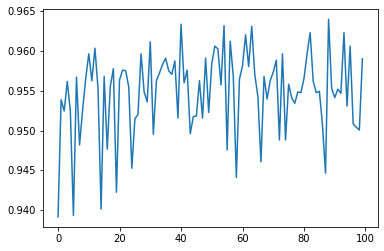

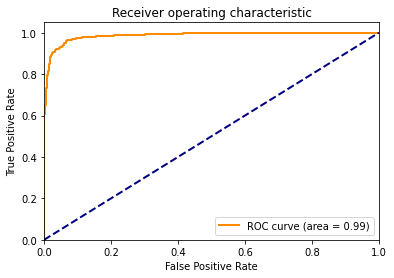

C:\Users\China\AppData\Local\Temp/ipykernel_18392/1963000591.py:36: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0.0, 1.0])


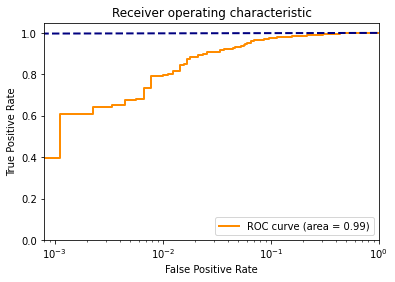

In [98]:
#minst 100
train2one(Perceptron(n_iter=100),mnist_train_58image, mnist_train_58label,mnist_test_58image, mnist_test_58label)

------------------------------------------------------------
Train starting.


100%|██████████| 1000/1000 [01:50<00:00,  9.05it/s]


Train finished.
Start evaluating.
Train acc: 0.9518275372604684
Test acc: 0.9389067524115756
------------------------------------------------------------


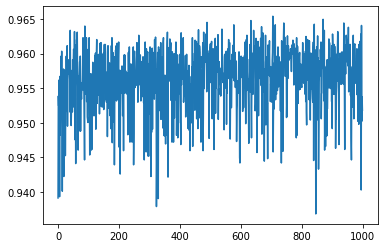

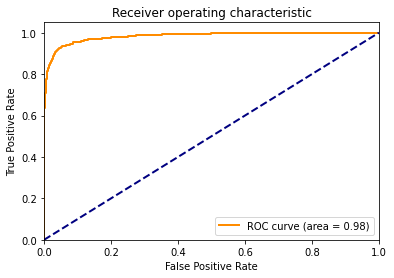

C:\Users\China\AppData\Local\Temp/ipykernel_18392/1963000591.py:36: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0.0, 1.0])


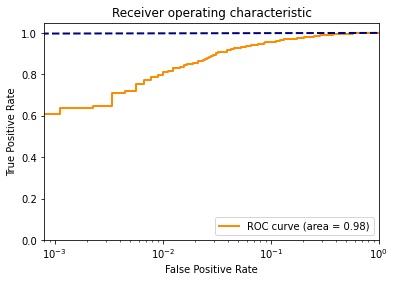

In [99]:
#minst 10000
train2one(Perceptron(n_iter=1000),mnist_train_58image, mnist_train_58label,mnist_test_58image, mnist_test_58label)

------------------------------------------------------------
Train starting.


100%|██████████| 100/100 [00:11<00:00,  8.86it/s]


Train finished.
Start evaluating.
Train acc: 0.9990833333333333
Test acc: 0.988
------------------------------------------------------------


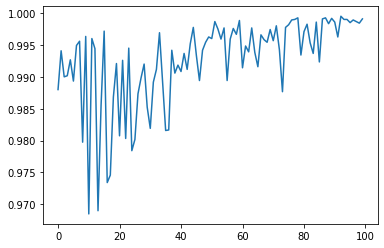

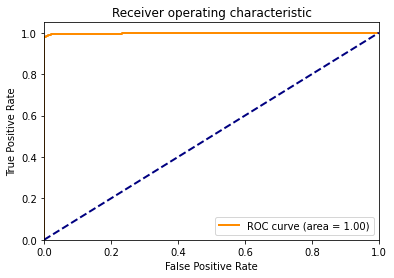

C:\Users\China\AppData\Local\Temp/ipykernel_18392/1963000591.py:36: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0.0, 1.0])


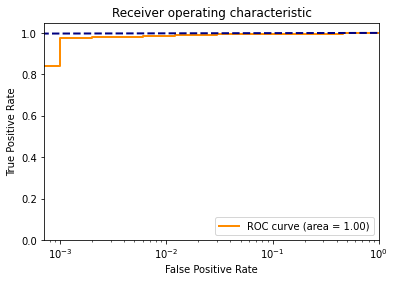

In [100]:
#fasionminst 100
train2one(Perceptron(n_iter=100),fasionmnist_train_58image, fasionmnist_train_58label,fasionmnist_test_58image, fasionmnist_test_58label)

------------------------------------------------------------
Train starting.


100%|██████████| 10000/10000 [18:53<00:00,  8.82it/s]


Train finished.
Start evaluating.
Train acc: 1.0
Test acc: 0.988
------------------------------------------------------------


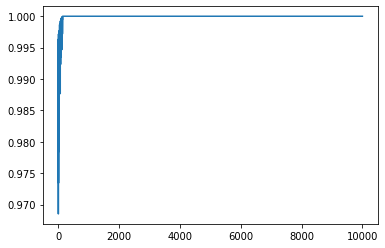

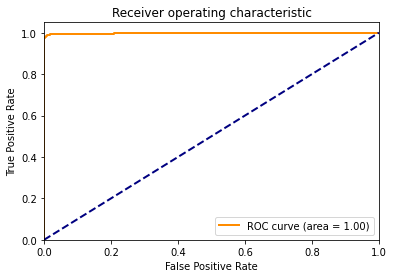

C:\Users\China\AppData\Local\Temp/ipykernel_18392/1963000591.py:36: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0.0, 1.0])


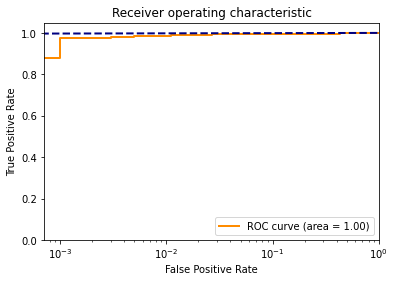

In [101]:
#fasionminst 10000
train2one(Perceptron(n_iter=10000),fasionmnist_train_58image, fasionmnist_train_58label,fasionmnist_test_58image, fasionmnist_test_58label)

## MSE的二分类

------------------------------------------------------------
Train starting.


C:\Users\China\AppData\Local\Temp/ipykernel_18392/1559670953.py:15: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.b = np.ones(m, dtype=np.float)
100%|██████████| 100/100 [00:00<00:00, 156.96it/s]


Train finished.
Start evaluating.
Train acc: 0.9744499645138396
Test acc: 0.9571275455519829
------------------------------------------------------------


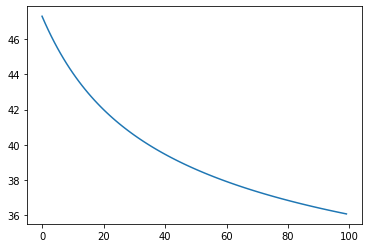

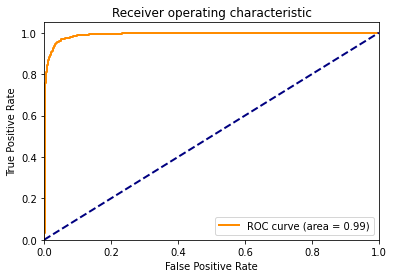

C:\Users\China\AppData\Local\Temp/ipykernel_18392/1963000591.py:36: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0.0, 1.0])


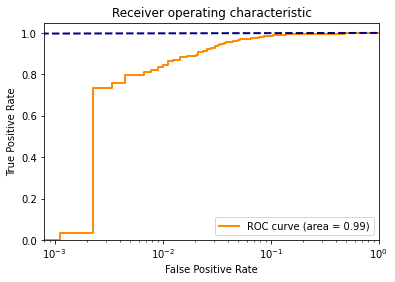

In [102]:
# mnist 100
train2one(MSE(n_iter=100),mnist_train_58image, mnist_train_58label,mnist_test_58image, mnist_test_58label)

------------------------------------------------------------
Train starting.


C:\Users\China\AppData\Local\Temp/ipykernel_18392/1559670953.py:15: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.b = np.ones(m, dtype=np.float)
100%|██████████| 100/100 [00:00<00:00, 164.91it/s]

Train finished.
Start evaluating.
Train acc: 0.9946666666666667
Test acc: 0.993
------------------------------------------------------------


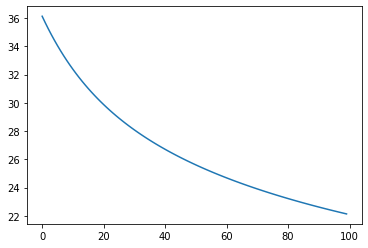

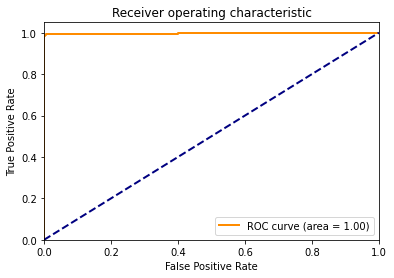

C:\Users\China\AppData\Local\Temp/ipykernel_18392/1963000591.py:36: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0.0, 1.0])


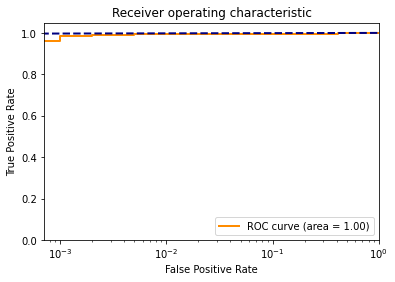

In [103]:
# fasionmnist 100
train2one(MSE(n_iter=100),fasionmnist_train_58image, fasionmnist_train_58label,fasionmnist_test_58image, fasionmnist_test_58label)

## Fisher二分类

------------------------------------------------------------
Train starting.


100%|██████████| 100/100 [00:04<00:00, 21.72it/s]

Train finished.
Start evaluating.
Train acc: 0.9687721788502484
Test acc: 0.9533762057877814
------------------------------------------------------------


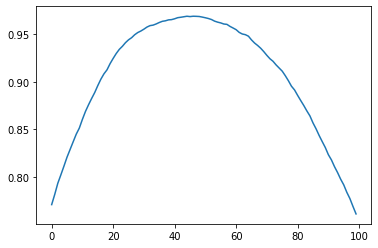

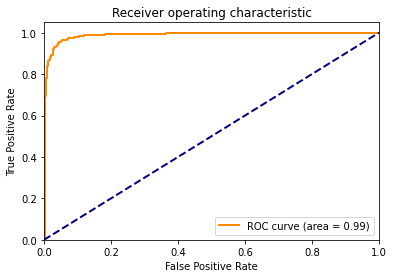

C:\Users\China\AppData\Local\Temp/ipykernel_18392/1963000591.py:36: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0.0, 1.0])


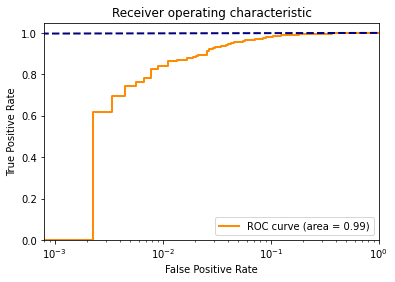

In [104]:
# mnist 100
train2one( Fisher(iter_n=100),mnist_train_58image, mnist_train_58label,mnist_test_58image, mnist_test_58label)

------------------------------------------------------------
Train starting.


100%|██████████| 100/100 [00:04<00:00, 20.73it/s]

Train finished.
Start evaluating.
Train acc: 0.9938333333333333
Test acc: 0.989
------------------------------------------------------------


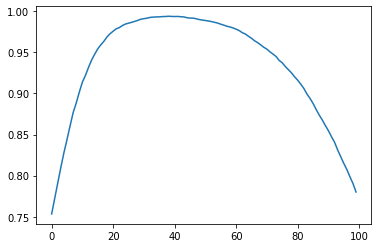

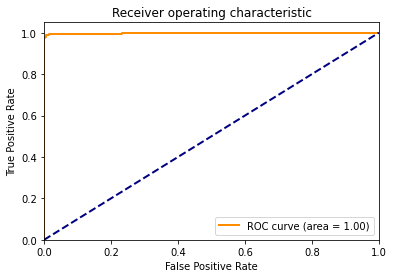

C:\Users\China\AppData\Local\Temp/ipykernel_18392/1963000591.py:36: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0.0, 1.0])


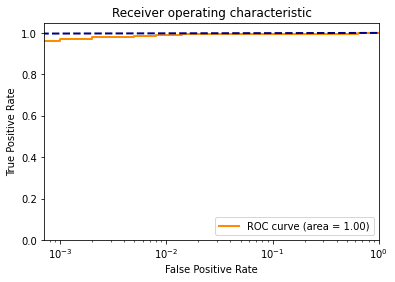

In [105]:
# fasionmnist 100
train2one( Fisher(iter_n=100),fasionmnist_train_58image, fasionmnist_train_58label,fasionmnist_test_58image, fasionmnist_test_58label)

## OVR分类

------------------------------------------------------------
Train starting.


100%|██████████| 10/10 [00:02<00:00,  3.86it/s]


Train finished.
Evaluate starting.
Train acc: 0.83235
Test acc: 0.8294
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.44      0.97      0.61       980
           1       0.98      0.93      0.96      1135
           2       0.96      0.79      0.87      1032
           3       0.95      0.75      0.84      1010
           4       0.90      0.91      0.90       982
           5       0.90      0.75      0.82       892
           6       0.93      0.88      0.90       958
           7       0.94      0.87      0.90      1028
           8       0.89      0.72      0.79       974
           9       0.94      0.71      0.81      1009

    accuracy                           0.83     10000
   macro avg       0.88      0.83      0.84     10000
weighted avg       0.89      0.83      0.84     10000



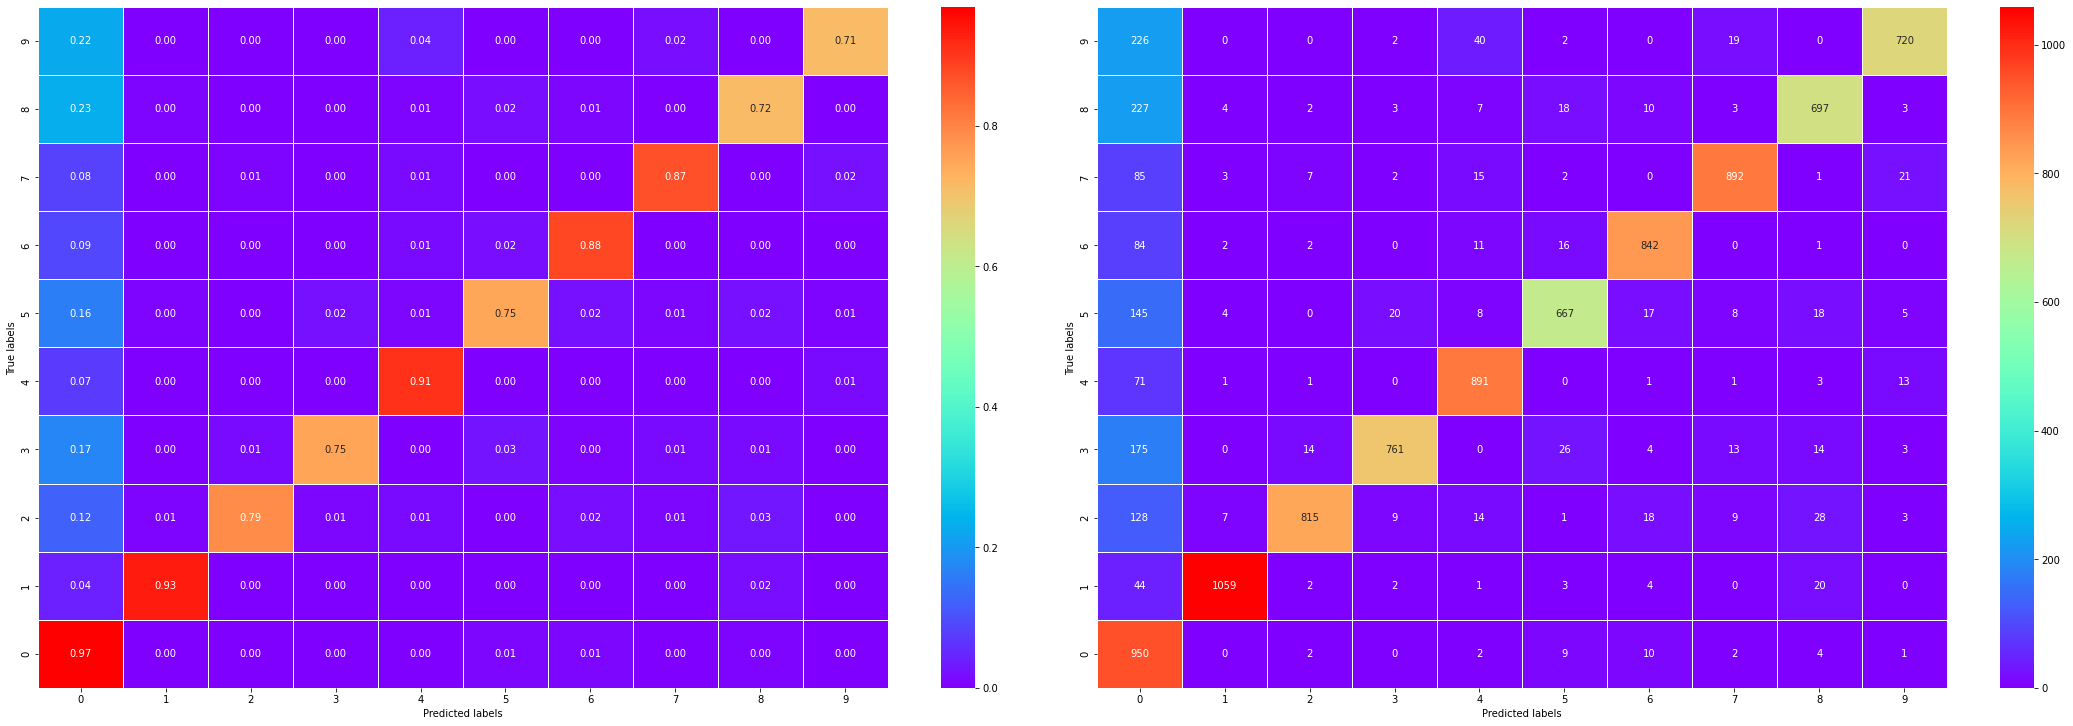

In [106]:
# mnsit
trainN(OVR(Fisher, n_class=10), mnist_train_image, mnist_train_label, mnist_test_image, mnist_test_label)

------------------------------------------------------------
Train starting.


100%|██████████| 10/10 [00:02<00:00,  3.80it/s]


Train finished.
Evaluate starting.
Train acc: 0.79125
Test acc: 0.7701
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.41      0.86      0.55      1000
           1       0.99      0.95      0.97      1000
           2       0.75      0.61      0.67      1000
           3       0.83      0.75      0.79      1000
           4       0.77      0.61      0.68      1000
           5       0.96      0.79      0.86      1000
           6       0.65      0.46      0.54      1000
           7       0.89      0.90      0.90      1000
           8       0.93      0.87      0.90      1000
           9       0.93      0.91      0.92      1000

    accuracy                           0.77     10000
   macro avg       0.81      0.77      0.78     10000
weighted avg       0.81      0.77      0.78     10000



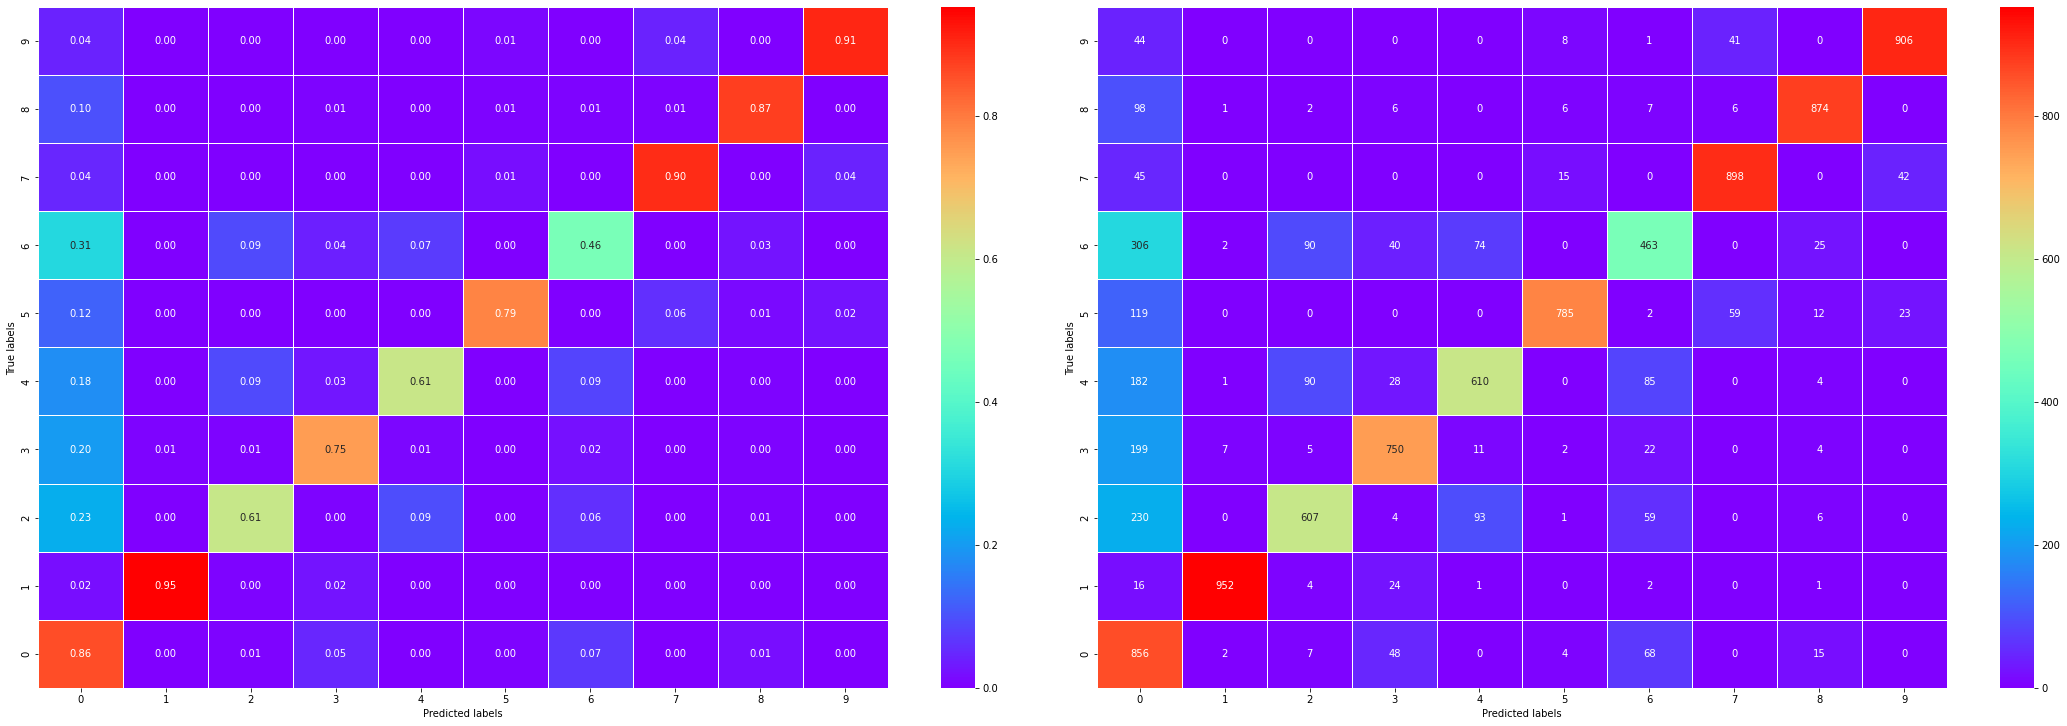

In [107]:
# fasionmnist
trainN(OVR(Fisher, n_class=10), fasionmnist_train_image, fasionmnist_train_label,fasionmnist_test_image, fasionmnist_test_label)

## OVO

In [108]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import LogisticRegression

------------------------------------------------------------
Train starting.


D:\Software\Anoconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Software\Anoconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Train finished.
Evaluate starting.
Train acc: 0.9735333333333334
Test acc: 0.9275
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       980
           1       0.97      0.98      0.97      1135
           2       0.92      0.91      0.92      1032
           3       0.90      0.92      0.91      1010
           4       0.93      0.96      0.94       982
           5       0.89      0.87      0.88       892
           6       0.95      0.94      0.95       958
           7       0.94      0.93      0.93      1028
           8       0.86      0.90      0.88       974
           9       0.93      0.90      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



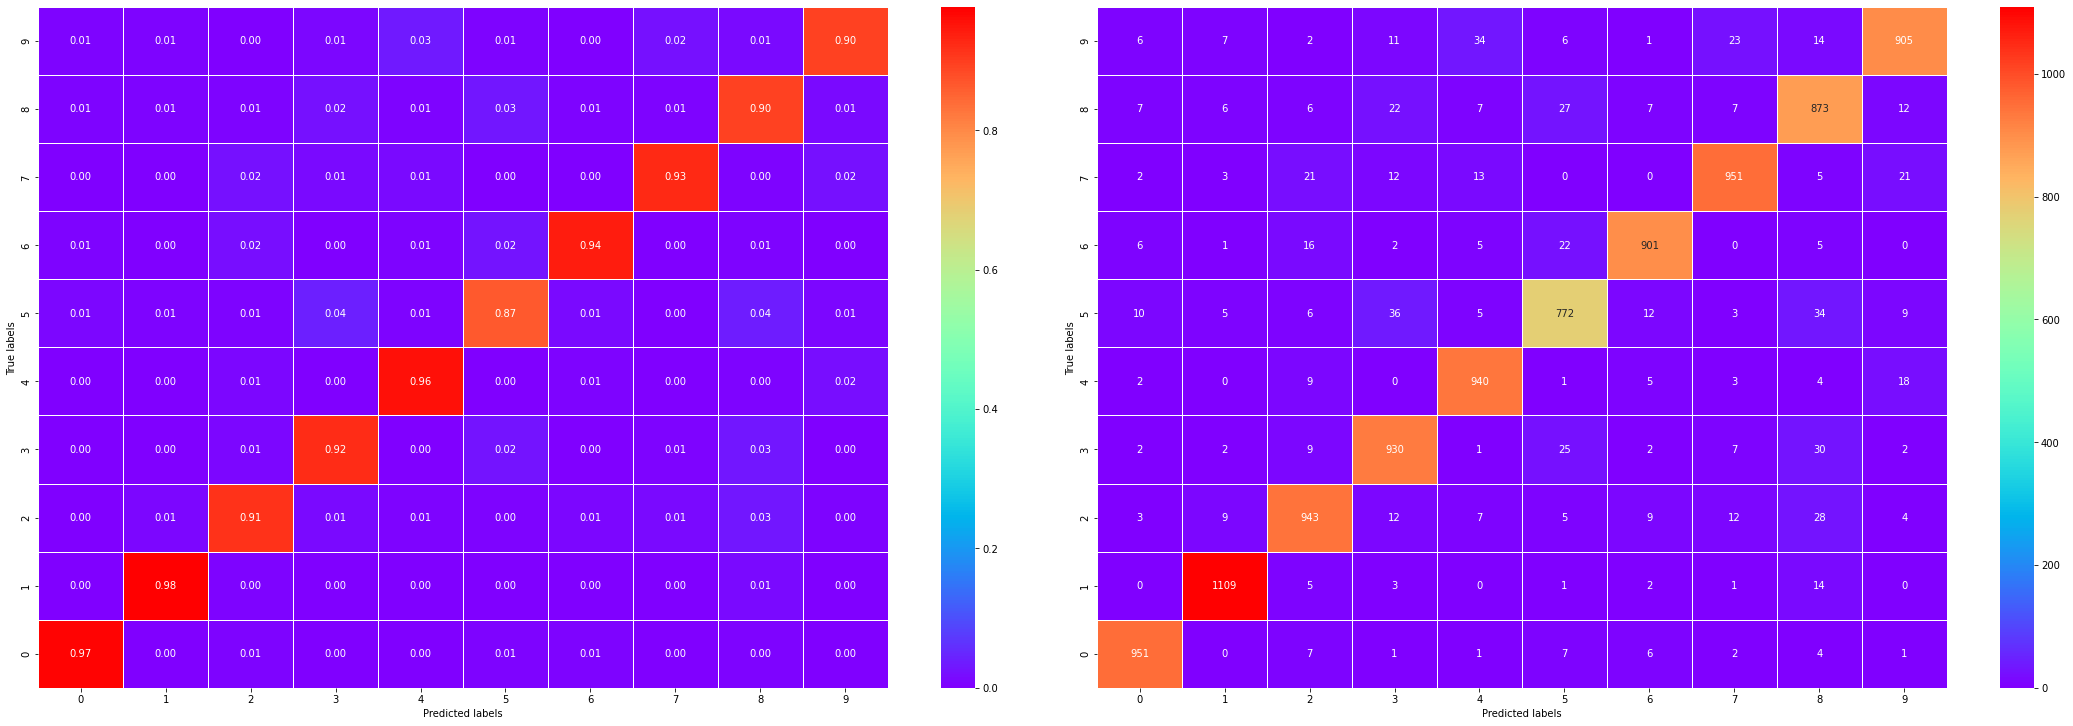

In [109]:
# mnist
trainN(OneVsOneClassifier(LogisticRegression()), mnist_train_image, mnist_train_label, mnist_test_image, mnist_test_label)

------------------------------------------------------------
Train starting.


D:\Software\Anoconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Software\Anoconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Train finished.
Evaluate starting.
Train acc: 0.8933166666666666
Test acc: 0.841
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.79      0.79      1000
           1       0.96      0.96      0.96      1000
           2       0.75      0.76      0.75      1000
           3       0.83      0.84      0.83      1000
           4       0.74      0.78      0.76      1000
           5       0.93      0.91      0.92      1000
           6       0.64      0.56      0.60      1000
           7       0.92      0.93      0.93      1000
           8       0.92      0.94      0.93      1000
           9       0.94      0.94      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



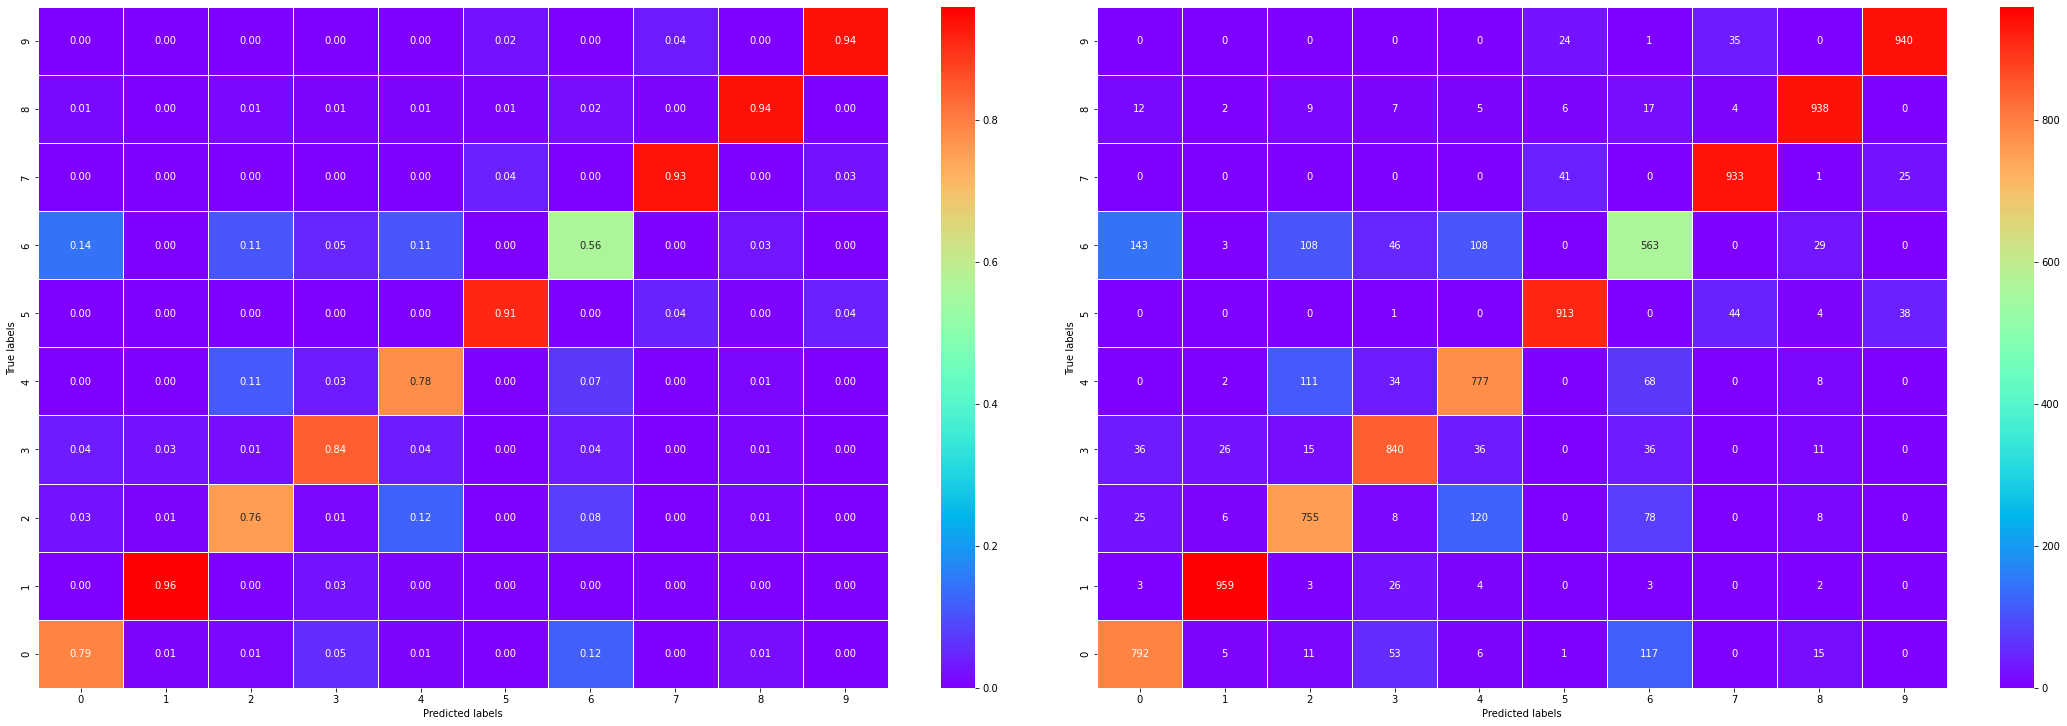

In [110]:
# fasionmnist
trainN(OneVsOneClassifier(LogisticRegression()), fasionmnist_train_image, fasionmnist_train_label,fasionmnist_test_image, fasionmnist_test_label)

------------------------------------------------------------
Train starting.
Train finished.
Evaluate starting.
Train acc: 1.0
Test acc: 0.95
------------------------------------------------------------
              precision    recall  f1-score   support

         2.0       1.00      1.00      1.00         1
         3.0       0.83      1.00      0.91         5
         4.0       1.00      1.00      1.00         4
         5.0       0.43      1.00      0.60         3
         6.0       1.00      1.00      1.00         2
         7.0       1.00      1.00      1.00         2
         8.0       1.00      1.00      1.00         2
         9.0       1.00      1.00      1.00         3
        10.0       1.00      1.00      1.00         1
        11.0       1.00      1.00      1.00         3
        12.0       1.00      1.00      1.00         6
        13.0       1.00      1.00      1.00         3
        14.0       1.00      1.00      1.00         2
        15.0       1.00      1.00      1

D:\Software\Anoconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Software\Anoconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Software\Anoconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\China\AppData\Local\Temp/ipykernel_18392/2016035050.py:38:

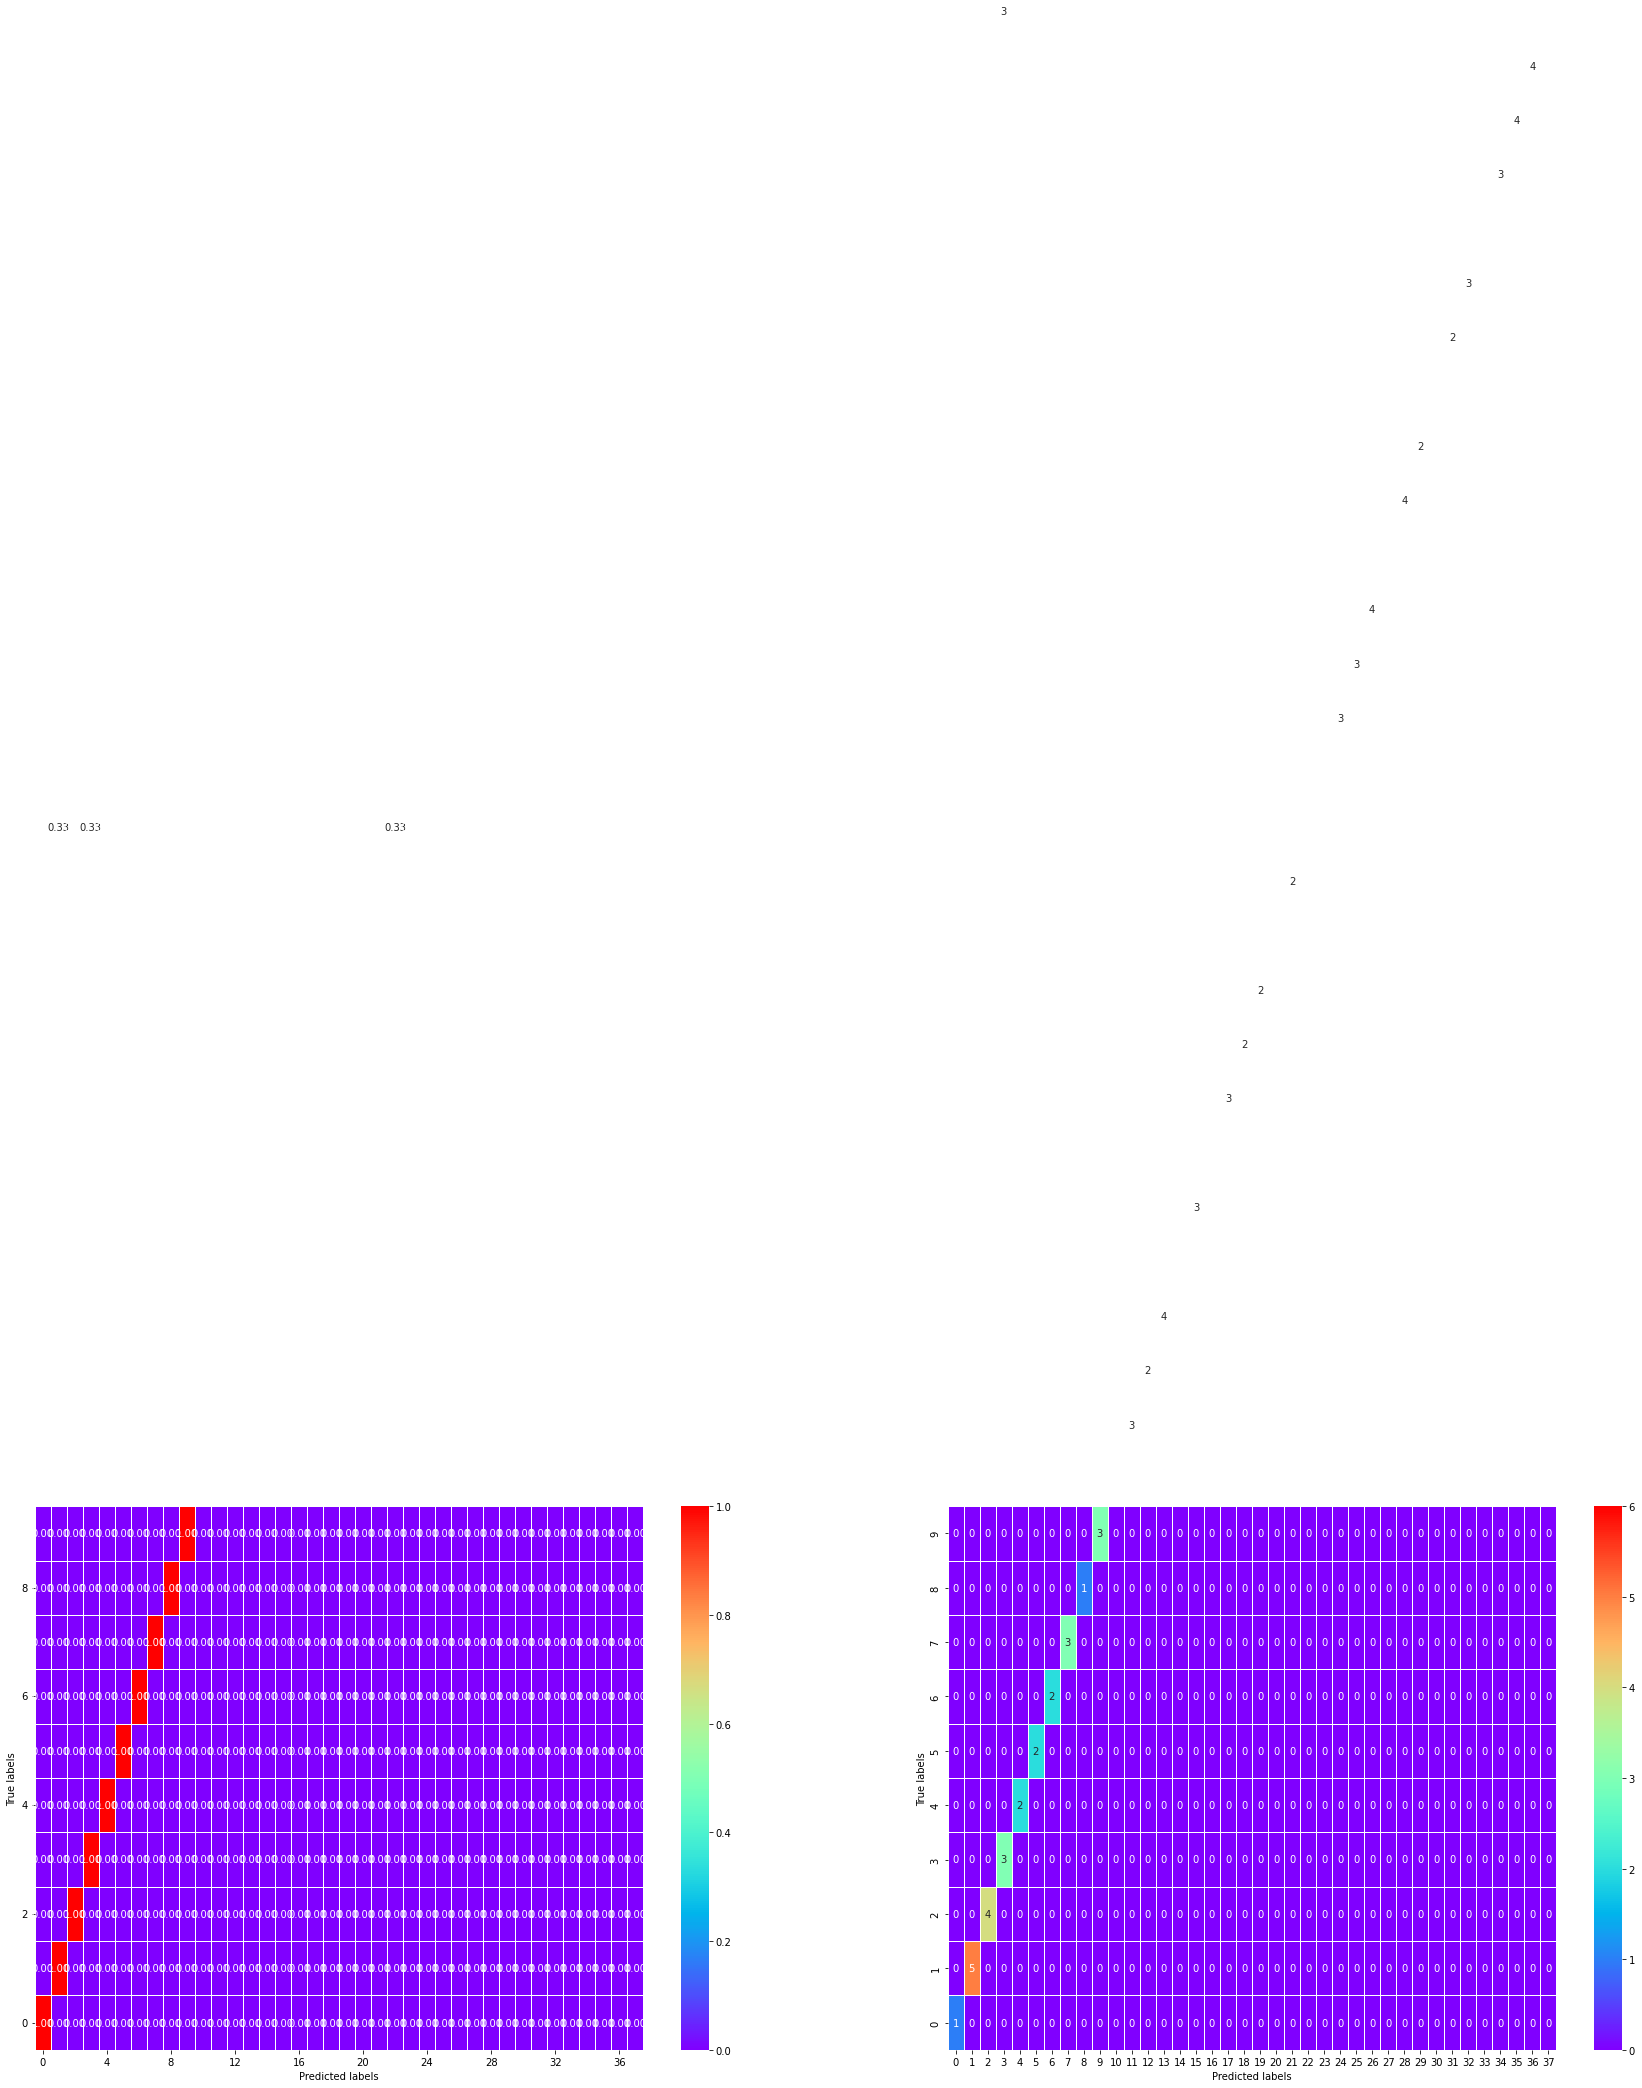

In [111]:
# orl
trainN(OneVsOneClassifier(LogisticRegression()), face_train_image, face_train_label,face_test_image, face_test_label)

## SVM

In [112]:
from sklearn import svm

------------------------------------------------------------
Train starting.
Train finished.
Start evaluating.
Train acc: 0.997959545777147
Test acc: 0.9957127545551983
------------------------------------------------------------


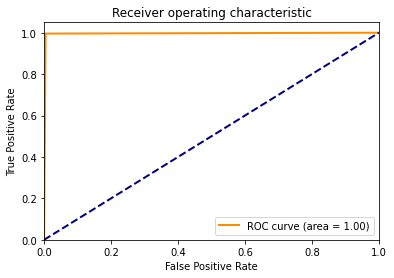

C:\Users\China\AppData\Local\Temp/ipykernel_18392/1963000591.py:73: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0.0, 1.0])


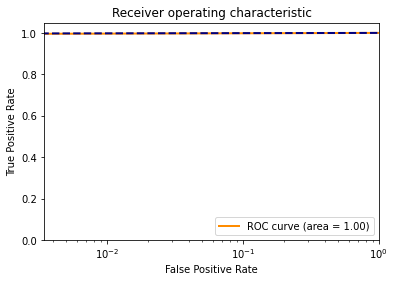

In [113]:
# mnist 2
train2two( svm.SVC(decision_function_shape='ovo'),mnist_train_58image, mnist_train_58label,mnist_test_58image, mnist_test_58label)

------------------------------------------------------------
Train starting.
Train finished.
Start evaluating.
Train acc: 0.9979166666666667
Test acc: 0.9965
------------------------------------------------------------


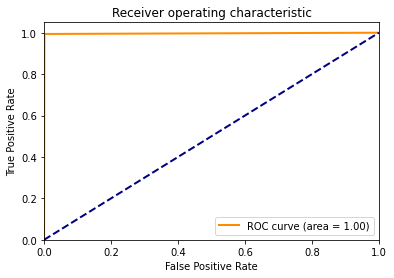

C:\Users\China\AppData\Local\Temp/ipykernel_18392/1963000591.py:73: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0.0, 1.0])


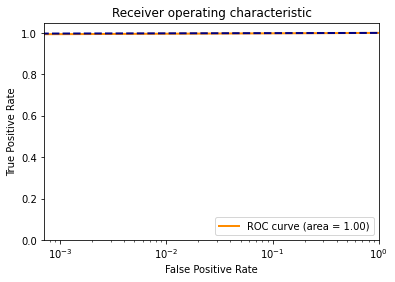

In [114]:
# fasion mnist
train2two( svm.SVC(decision_function_shape='ovo'),fasionmnist_train_58image, fasionmnist_train_58label,fasionmnist_test_58image, fasionmnist_test_58label)

------------------------------------------------------------
Train starting.
Train finished.
Evaluate starting.
Train acc: 0.9128
Test acc: 0.8828
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1000
           1       0.99      0.96      0.98      1000
           2       0.79      0.82      0.80      1000
           3       0.87      0.89      0.88      1000
           4       0.81      0.81      0.81      1000
           5       0.96      0.95      0.96      1000
           6       0.72      0.65      0.69      1000
           7       0.93      0.95      0.94      1000
           8       0.97      0.98      0.97      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



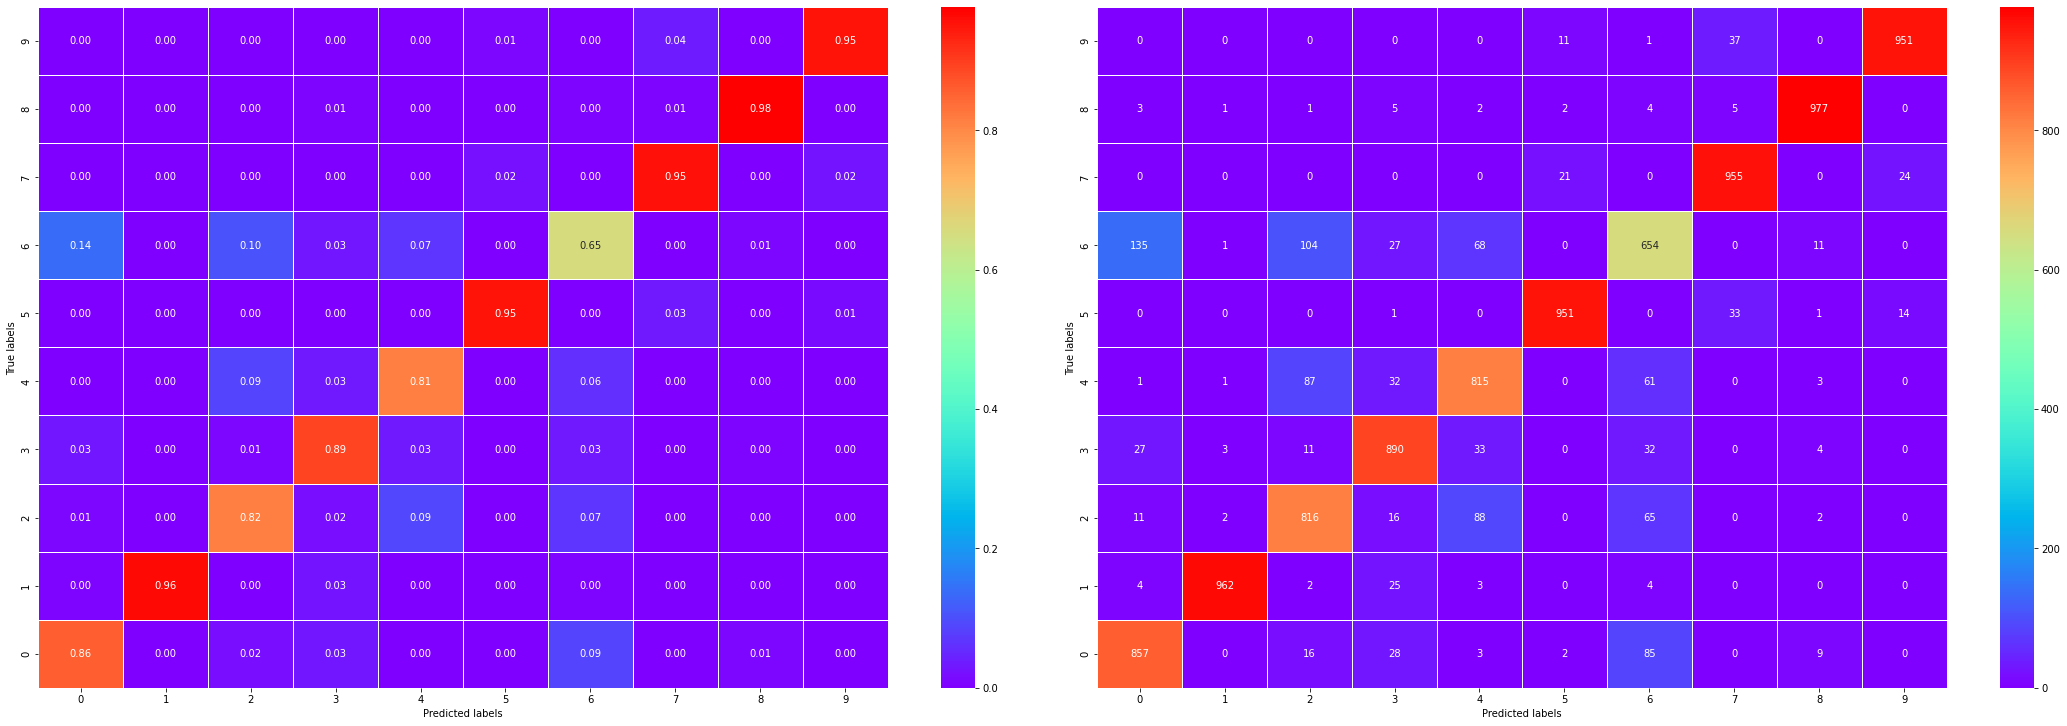

In [115]:
# fasionmnist
trainN(svm.SVC(decision_function_shape='ovr'), fasionmnist_train_image, fasionmnist_train_label,fasionmnist_test_image, fasionmnist_test_label)

------------------------------------------------------------
Train starting.
Train finished.
Evaluate starting.
Train acc: 0.9899166666666667
Test acc: 0.9792
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



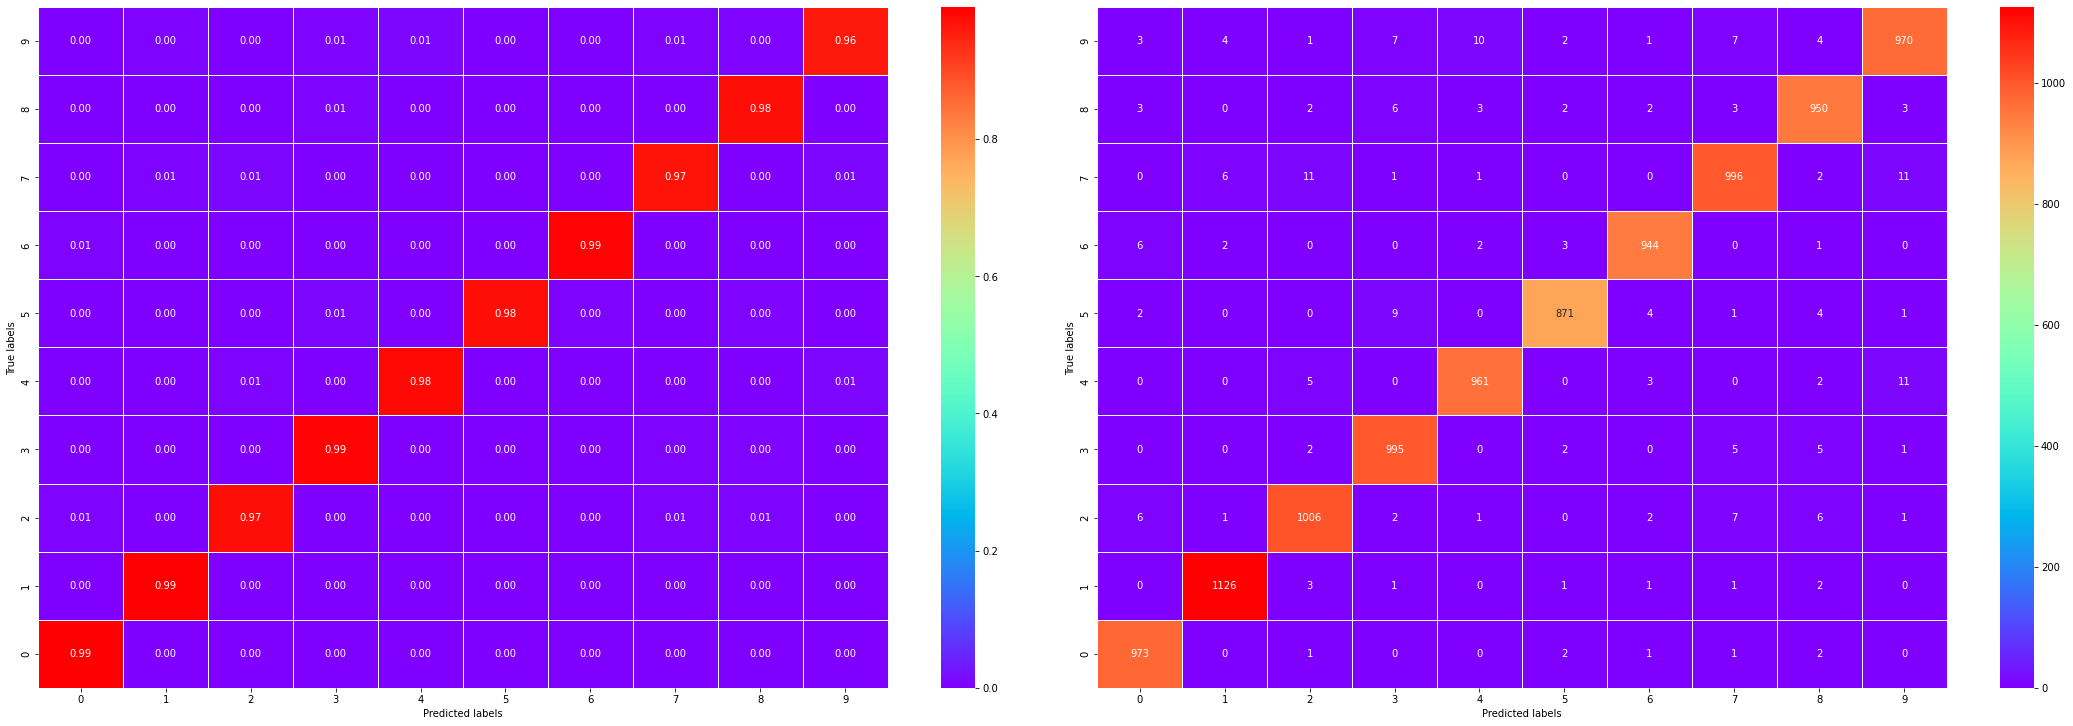

In [116]:
# svm 10 ovr
# mnist
trainN(svm.SVC(decision_function_shape='ovr'), mnist_train_image, mnist_train_label, mnist_test_image, mnist_test_label)

------------------------------------------------------------
Train starting.
Train finished.
Evaluate starting.
Train acc: 1.0
Test acc: 0.9416666666666667
------------------------------------------------------------
              precision    recall  f1-score   support

         2.0       1.00      1.00      1.00         1
         3.0       1.00      1.00      1.00         5
         4.0       1.00      1.00      1.00         4
         5.0       0.38      1.00      0.55         3
         6.0       1.00      1.00      1.00         2
         7.0       1.00      1.00      1.00         2
         8.0       1.00      1.00      1.00         2
         9.0       1.00      1.00      1.00         3
        10.0       1.00      1.00      1.00         1
        11.0       1.00      1.00      1.00         3
        12.0       1.00      1.00      1.00         6
        13.0       1.00      1.00      1.00         3
        14.0       1.00      1.00      1.00         2
        15.0       1.00   

D:\Software\Anoconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Software\Anoconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Software\Anoconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\China\AppData\Local\Temp/ipykernel_18392/2016035050.py:38:

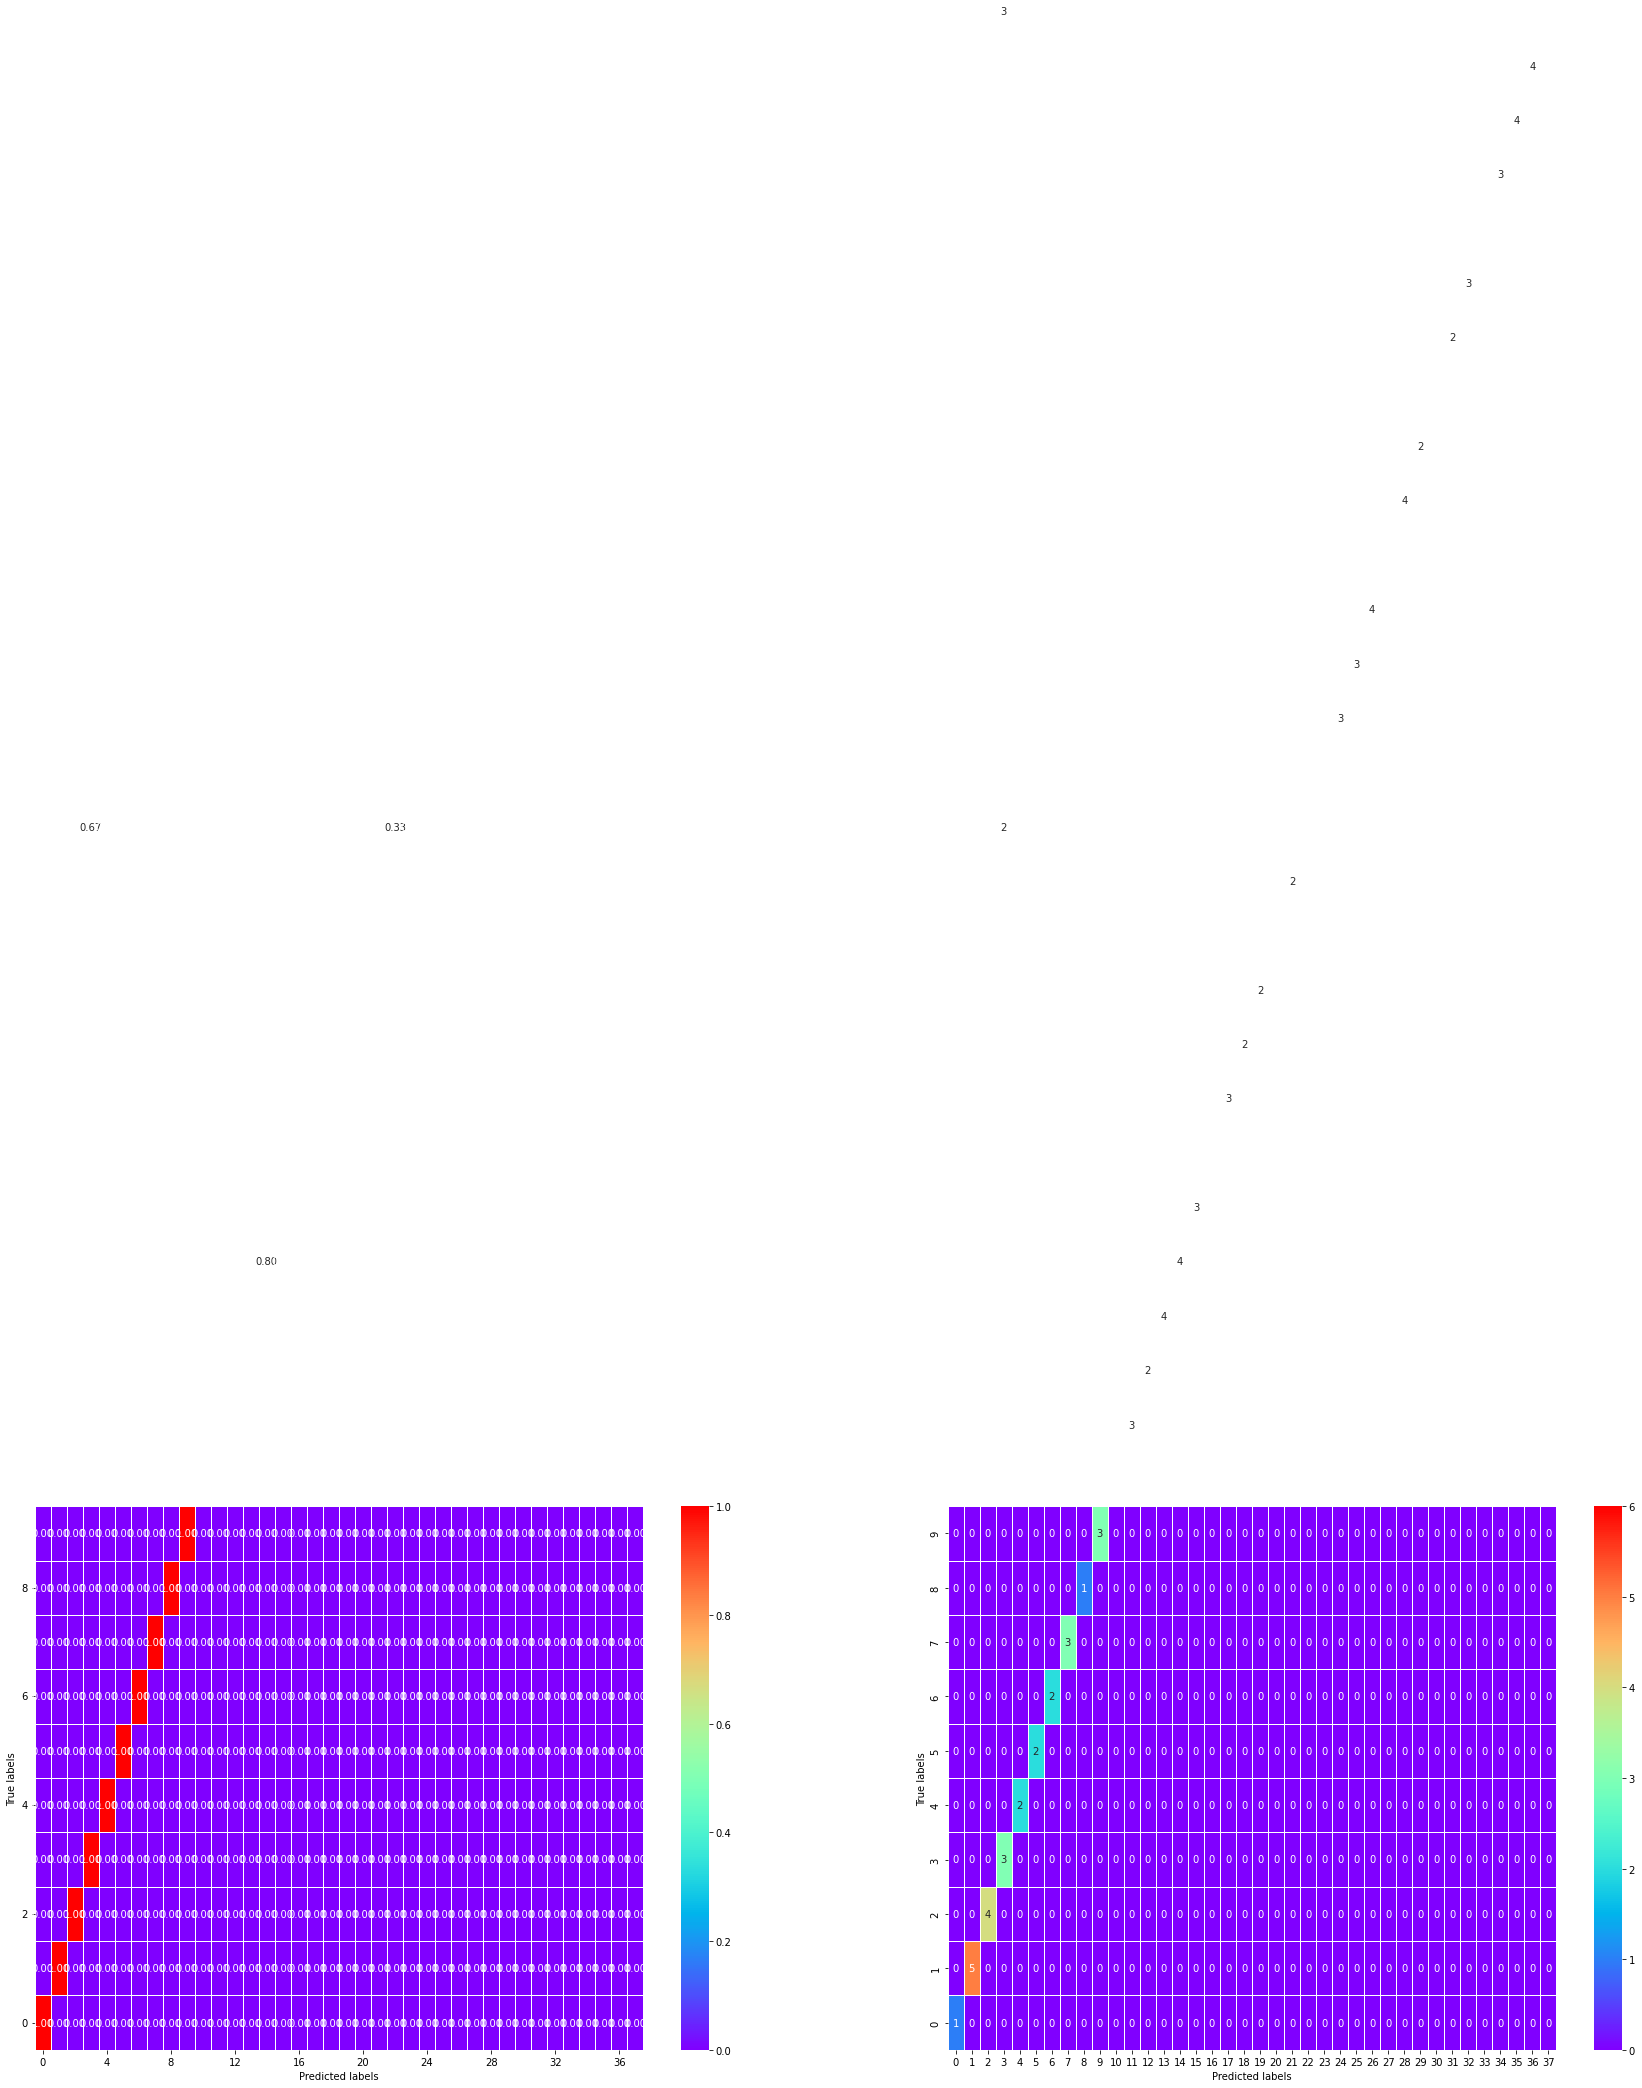

In [117]:
trainN(svm.SVC(kernel='rbf', C=10), face_train_image, face_train_label, face_test_image, face_test_label)

## KNN

In [77]:
from sklearn.neighbors import KNeighborsClassifier

------------------------------------------------------------
Train starting.
Train finished.
Start evaluating.
Train acc: 0.9909510290986515
Test acc: 0.977491961414791
------------------------------------------------------------


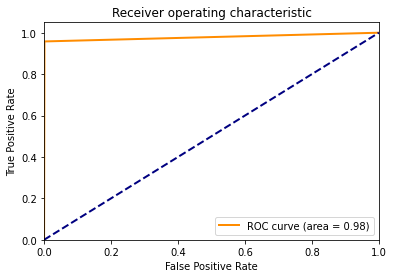

C:\Users\China\AppData\Local\Temp/ipykernel_18392/1963000591.py:73: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0.0, 1.0])


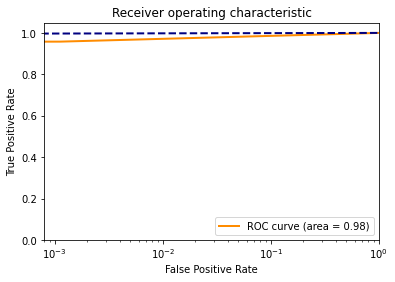

------------------------------------------------------------
Train starting.
Train finished.
Start evaluating.
Train acc: 0.9985833333333334
Test acc: 0.9965
------------------------------------------------------------


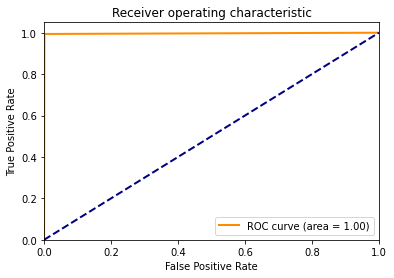

C:\Users\China\AppData\Local\Temp/ipykernel_18392/1963000591.py:73: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0.0, 1.0])


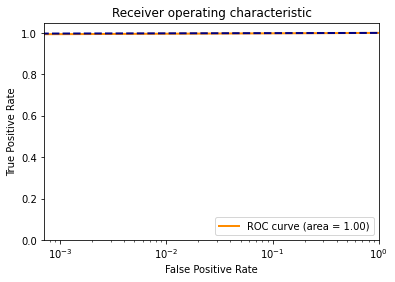

In [119]:
# KNN2
# mnist
train2two(KNeighborsClassifier(n_neighbors = 2, algorithm = 'auto'), mnist_train_58image, mnist_train_58label,mnist_test_58image, mnist_test_58label)

# fasionmnist
train2two(KNeighborsClassifier(n_neighbors = 2, algorithm = 'auto'), fasionmnist_train_58image, fasionmnist_train_58label,fasionmnist_test_58image, fasionmnist_test_58label)

------------------------------------------------------------
Train starting.
Train finished.
Evaluate starting.
Train acc: 0.975
Test acc: 0.9665
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.94      1.00      0.97      1135
           2       0.98      0.95      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.96      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.95      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

----------------------------------

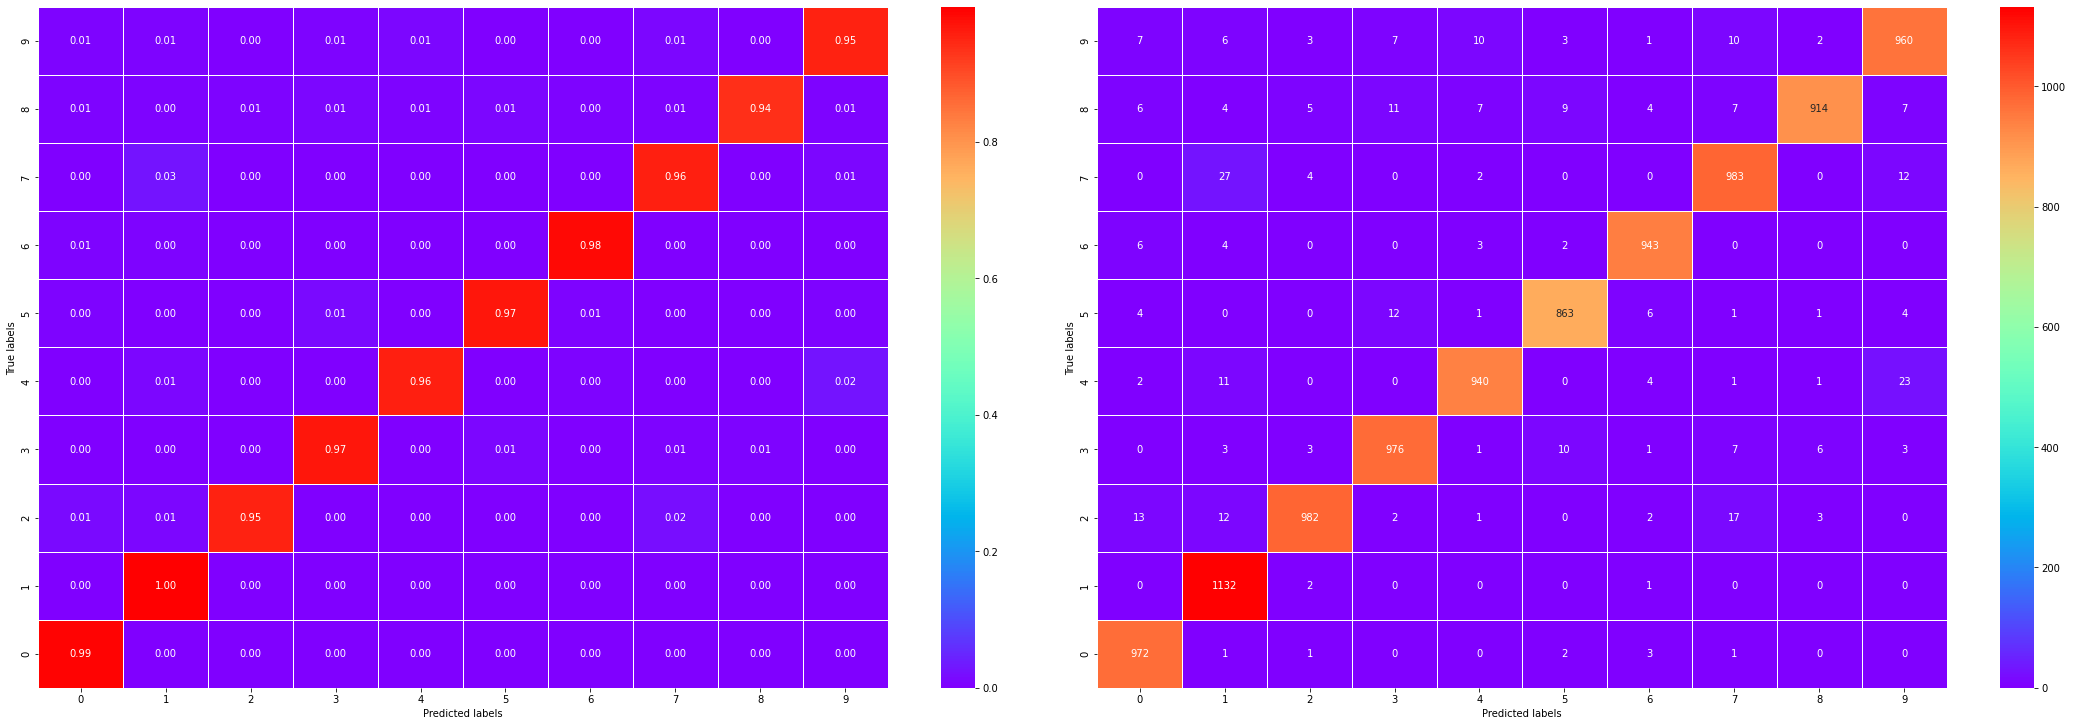

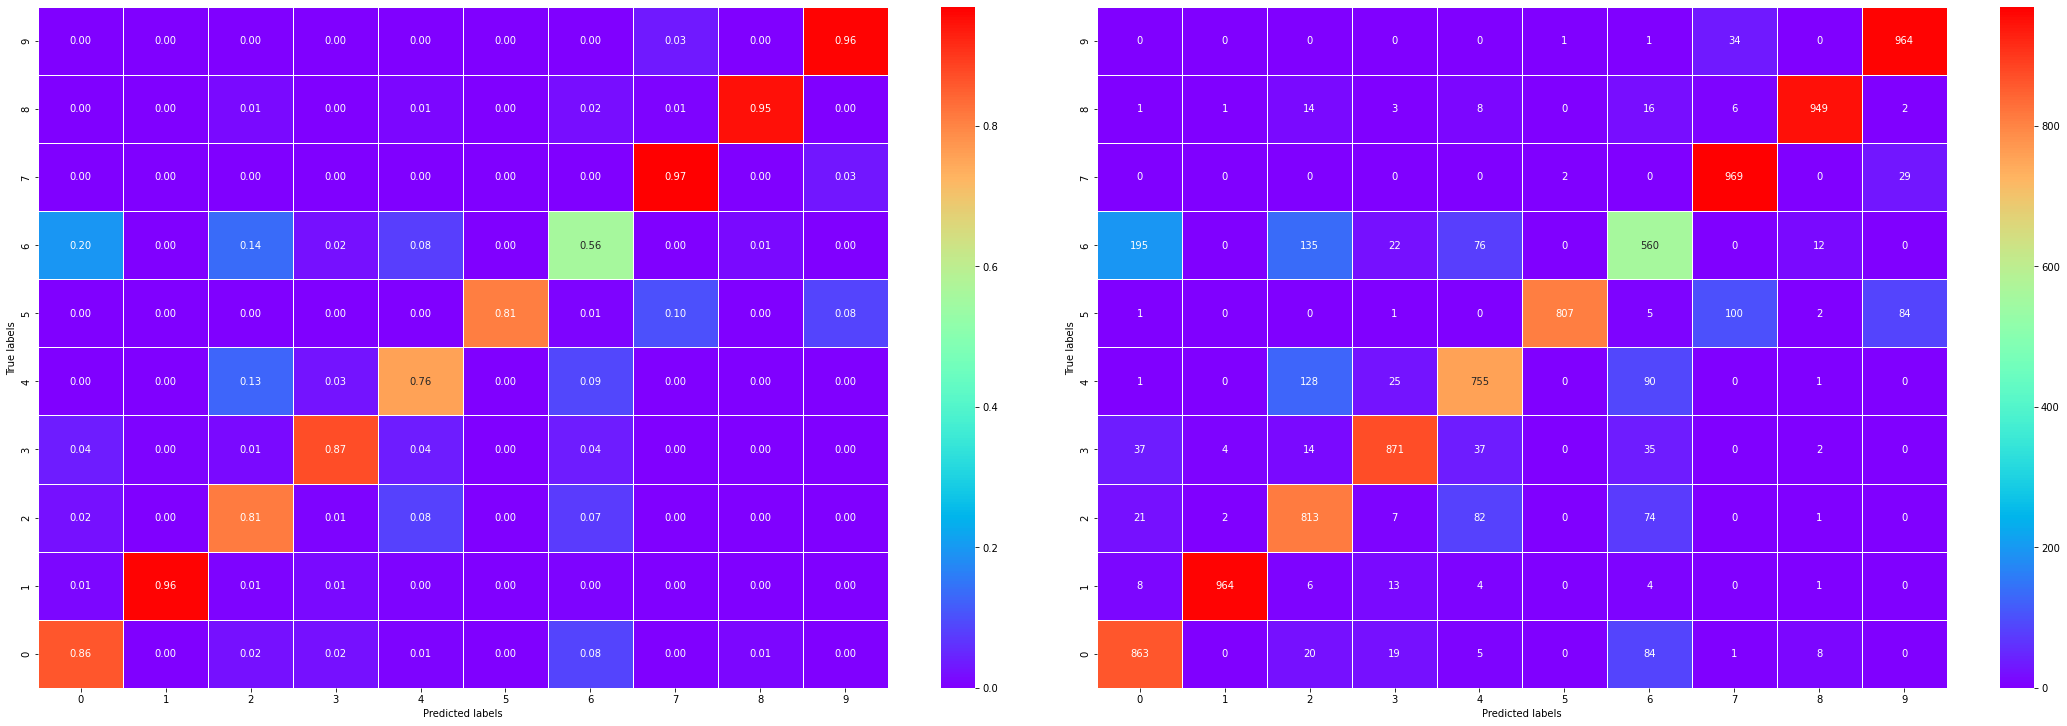

In [120]:
# KNN 10
# mnist
trainN(KNeighborsClassifier(n_neighbors = 10, algorithm = 'auto'), mnist_train_image, mnist_train_label, mnist_test_image, mnist_test_label)

# fasionmnist
trainN(KNeighborsClassifier(n_neighbors = 10, algorithm = 'auto'), fasionmnist_train_image, fasionmnist_train_label,fasionmnist_test_image, fasionmnist_test_label)

In [23]:
# KNN 10
# mnist
trainN(KNN(n_neighbors = 10), mnist_train_image, mnist_train_label, mnist_test_image, mnist_test_label)

------------------------------------------------------------
Train starting.
Train finished.
Evaluate starting.


## K-means

In [121]:
exp_k_means2(mnist_train_58image, mnist_train_58label)

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.93s	32827091452	0.003	0.003	0.003	0.004	0.002	0.086
random   	0.94s	32827091452	0.003	0.003	0.003	0.004	0.002	0.082


In [122]:
exp_k_means2(fasionmnist_train_58image, fasionmnist_train_58label)

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.71s	38004930844	0.545	0.556	0.550	0.617	0.550	0.239
random   	0.60s	38004930844	0.545	0.556	0.550	0.617	0.550	0.229


In [123]:
exp_k_means10(mnist_train_image, mnist_train_label)

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	18.98s	152992609568	0.485	0.497	0.491	0.361	0.491	0.056
random   	16.90s	152992598943	0.485	0.496	0.491	0.361	0.490	0.071


In [124]:
exp_k_means10(fasionmnist_train_image, fasionmnist_train_label)

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	13.62s	124538957510	0.519	0.539	0.529	0.384	0.528	0.140
random   	11.94s	123980077004	0.500	0.524	0.512	0.348	0.512	0.162


# 数据预处理部分

## PCA

### 可视化数据变换

[332724.66744657 243283.9390705  211507.36705827 184776.38586219
 166926.83131066 147844.96167532 112178.20271178  98874.42962709
  94696.24905304  80809.82453195  72313.62025957  69358.30132665
  58826.87114946  58014.08401671  54123.75694879  50843.06852706
  45412.60630628  43778.45913157  40705.3404534   39519.79037989
  36553.53586136  34515.1938788   32693.28606333  31286.58581655
  30287.55259946  28776.07835035  27859.28540477  26960.58144171
  25533.19358798  23686.12297985  22562.76193847  22221.76640968
  20660.67182486  20110.98541392  19543.20092442  18638.29211807
  17340.90030818  16726.24478585  16505.8173745   16191.66315681
  15659.57994266  15251.21411619  14348.32884525  13652.8231403
  13198.86432525  12860.42927988  12411.48280031  12054.31597879
  11658.90431823  11035.47439069  10937.50779546  10724.52539262
  10147.77338838   9906.81588767   9741.41801432   9306.18378419
   9240.54996976   8861.73787802   8700.53134174   8392.32150248
   8245.75894554   8203.13

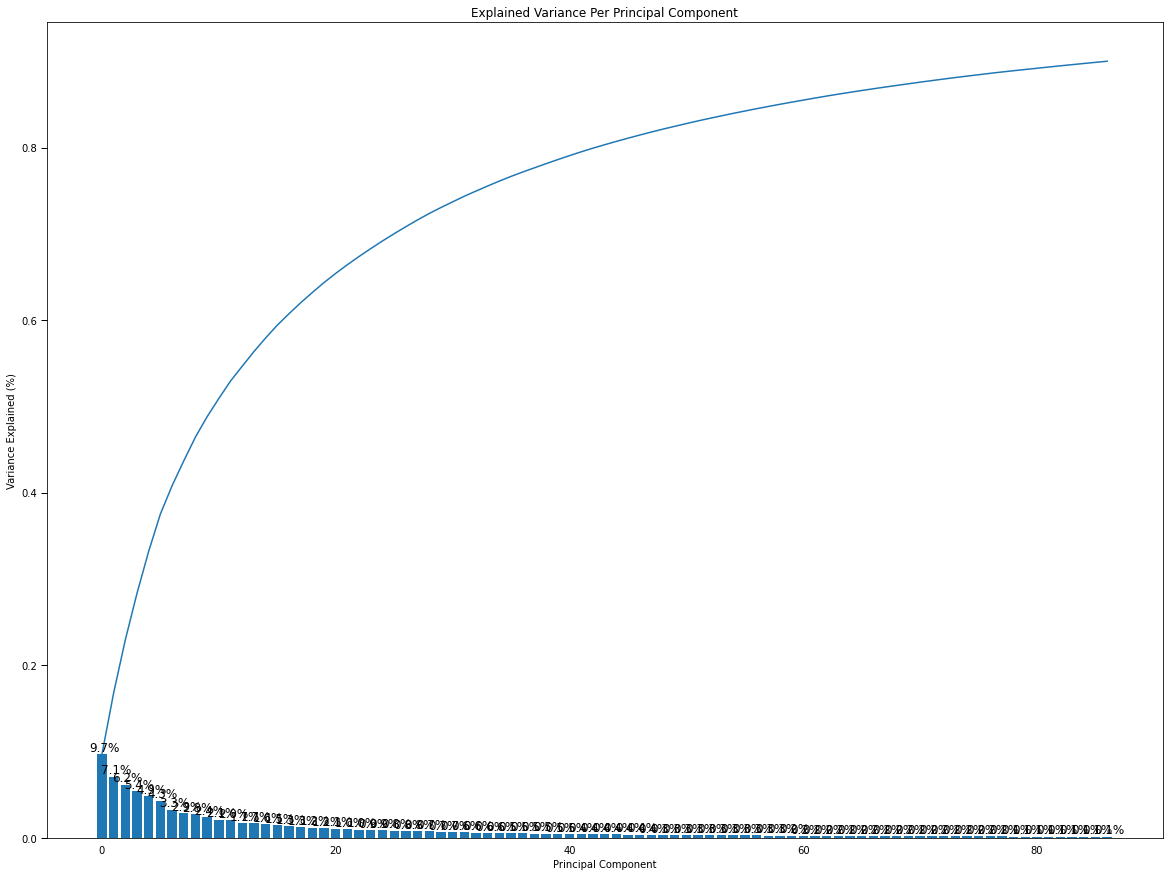

In [125]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(.90)  # .90 represents decomposition ratio
mnist_pca_dimentional_train1 = pca.fit_transform(mnist_train_image)
print(pca.explained_variance_)
print("n_components : ", mnist_pca_dimentional_train1.shape[1])
scree_plot(pca)


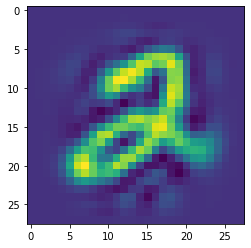

In [126]:
# Inverse Transfrom from 64 -> 784

apprx = pca.inverse_transform(mnist_pca_dimentional_train1)
plt.imshow(apprx[5].reshape(28,28))

[332724.66744657 243283.9390705  211507.36705827 184776.38586219
 166926.83131066 147844.96167532 112178.20271178  98874.42962709
  94696.24905304  80809.82453195  72313.62025957  69358.30132665
  58826.87114945  58014.0840167   54123.75694876  50843.06852702
  45412.60630622  43778.45913049  40705.34045029  39519.79037479
  36553.53585518  34515.19386694  32693.28598612  31286.58575745
  30287.55255976  28776.07820776  27859.28520598  26960.5805199
  25533.19144928  23686.11769066  22562.7606832   22221.74683012
  20660.6618469   20110.97950015  19543.16325868  18638.23087528
  17340.46215911  16723.7974995   16505.61883428  16191.11936955
  15657.31737907  15250.87988683  14345.143163    13648.56116634
  13191.13732685  12838.94376011  12381.59739292  12043.66752354
  11655.91483782  11010.14783993]
(60000, 50) <class 'numpy.ndarray'>


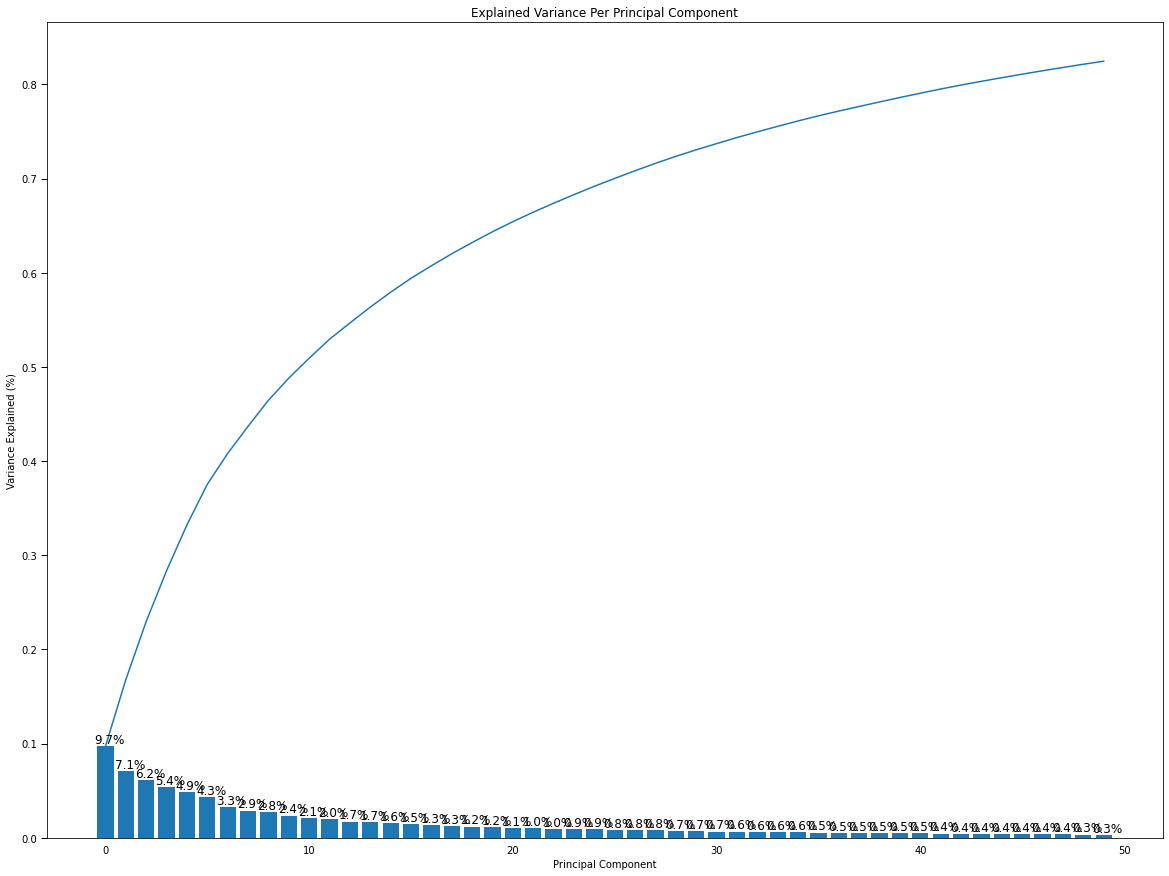

In [127]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=50)   # Max Componenet values = 728
mnist_pca_dimentional_train2 = pca.fit_transform(mnist_train_image)
print(pca.explained_variance_)
print(mnist_pca_dimentional_train2.shape, type(mnist_pca_dimentional_train2))
scree_plot(pca)

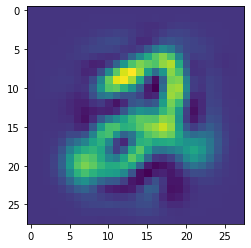

In [128]:
# Inverse Transfrom from 64 -> 784

apprx = pca.inverse_transform(mnist_pca_dimentional_train2)
plt.imshow(apprx[5].reshape(28,28))

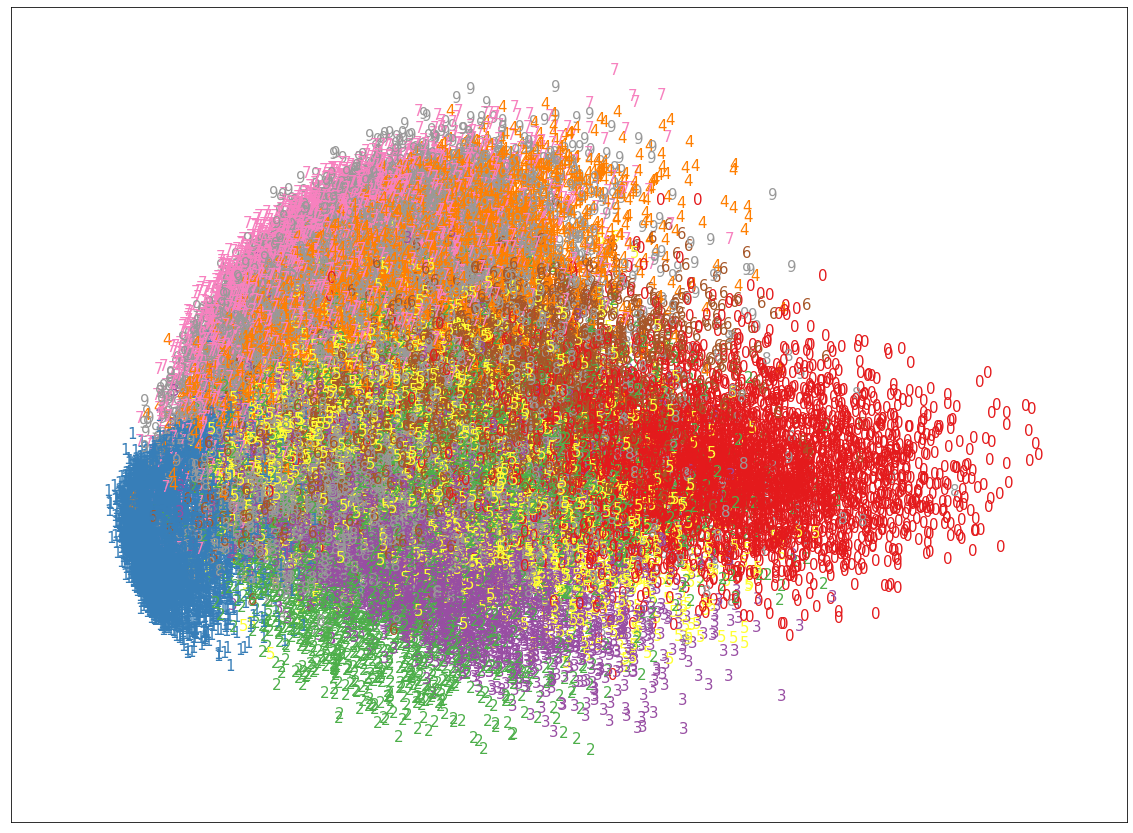

In [129]:
def plot_components(X, y):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)
    plt.figure(figsize=(20, 15))
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]), 
                 color=plt.cm.Set1(y[i]), 
                 fontdict={'size': 15})

    plt.xticks([]), plt.yticks([]), plt.ylim([-0.1,1.1]), plt.xlim([-0.1,1.1])
plot_components(mnist_pca_dimentional_train2, mnist_train_label)

## 训练评估

------------------------------------------------------------
Train starting.


D:\Software\Anoconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Software\Anoconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Train finished.
Evaluate starting.
Train acc: 0.97375
Test acc: 0.1217
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.67      0.72      0.70       980
           1       0.08      0.02      0.04      1135
           2       0.07      0.09      0.08      1032
           3       0.04      0.05      0.04      1010
           4       0.02      0.02      0.02       982
           5       0.15      0.14      0.15       892
           6       0.13      0.10      0.11       958
           7       0.02      0.02      0.02      1028
           8       0.05      0.06      0.06       974
           9       0.01      0.01      0.01      1009

    accuracy                           0.12     10000
   macro avg       0.12      0.12      0.12     10000
weighted avg       0.12      0.12      0.12     10000



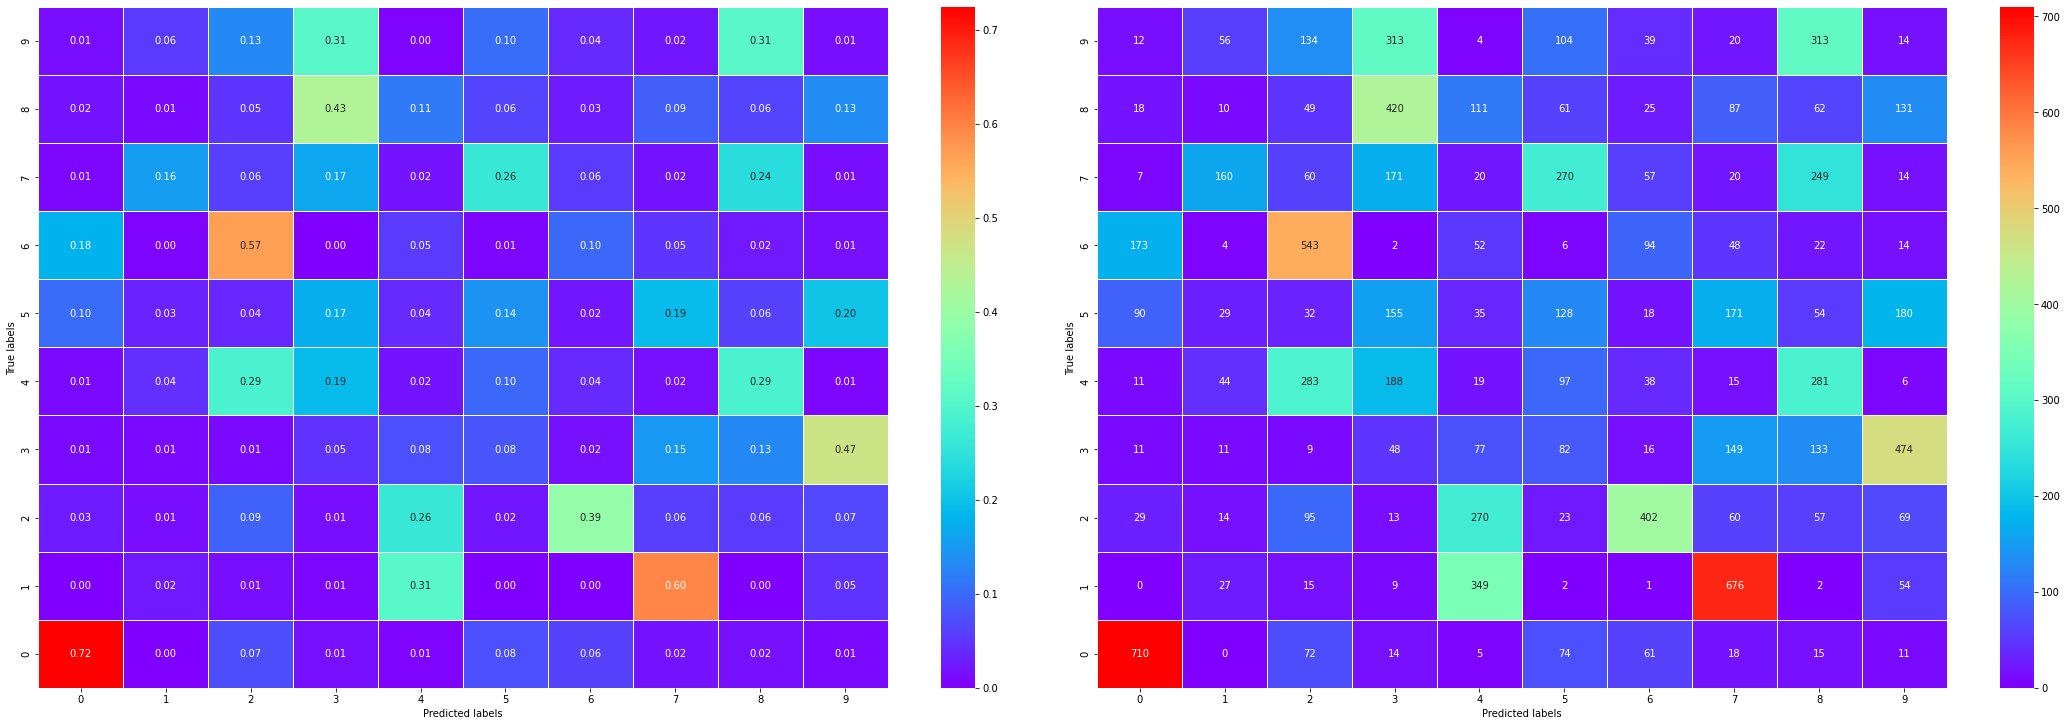

In [130]:

pca = PCA(n_components=500)   # Max Componenet values = 728
mnist_pca_dimentional_train = pca.fit_transform(mnist_train_image)
mnist_pca_dimentional_test = pca.fit_transform(mnist_test_image)
# mnist
trainN(OneVsOneClassifier(LogisticRegression()), mnist_pca_dimentional_train, mnist_train_label, mnist_pca_dimentional_test, mnist_test_label)

------------------------------------------------------------
Train starting.


D:\Software\Anoconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Software\Anoconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Train finished.
Evaluate starting.
Train acc: 0.8933166666666666
Test acc: 0.841
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.79      0.79      1000
           1       0.96      0.96      0.96      1000
           2       0.75      0.76      0.75      1000
           3       0.83      0.84      0.83      1000
           4       0.74      0.78      0.76      1000
           5       0.93      0.91      0.92      1000
           6       0.64      0.56      0.60      1000
           7       0.92      0.93      0.93      1000
           8       0.92      0.94      0.93      1000
           9       0.94      0.94      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



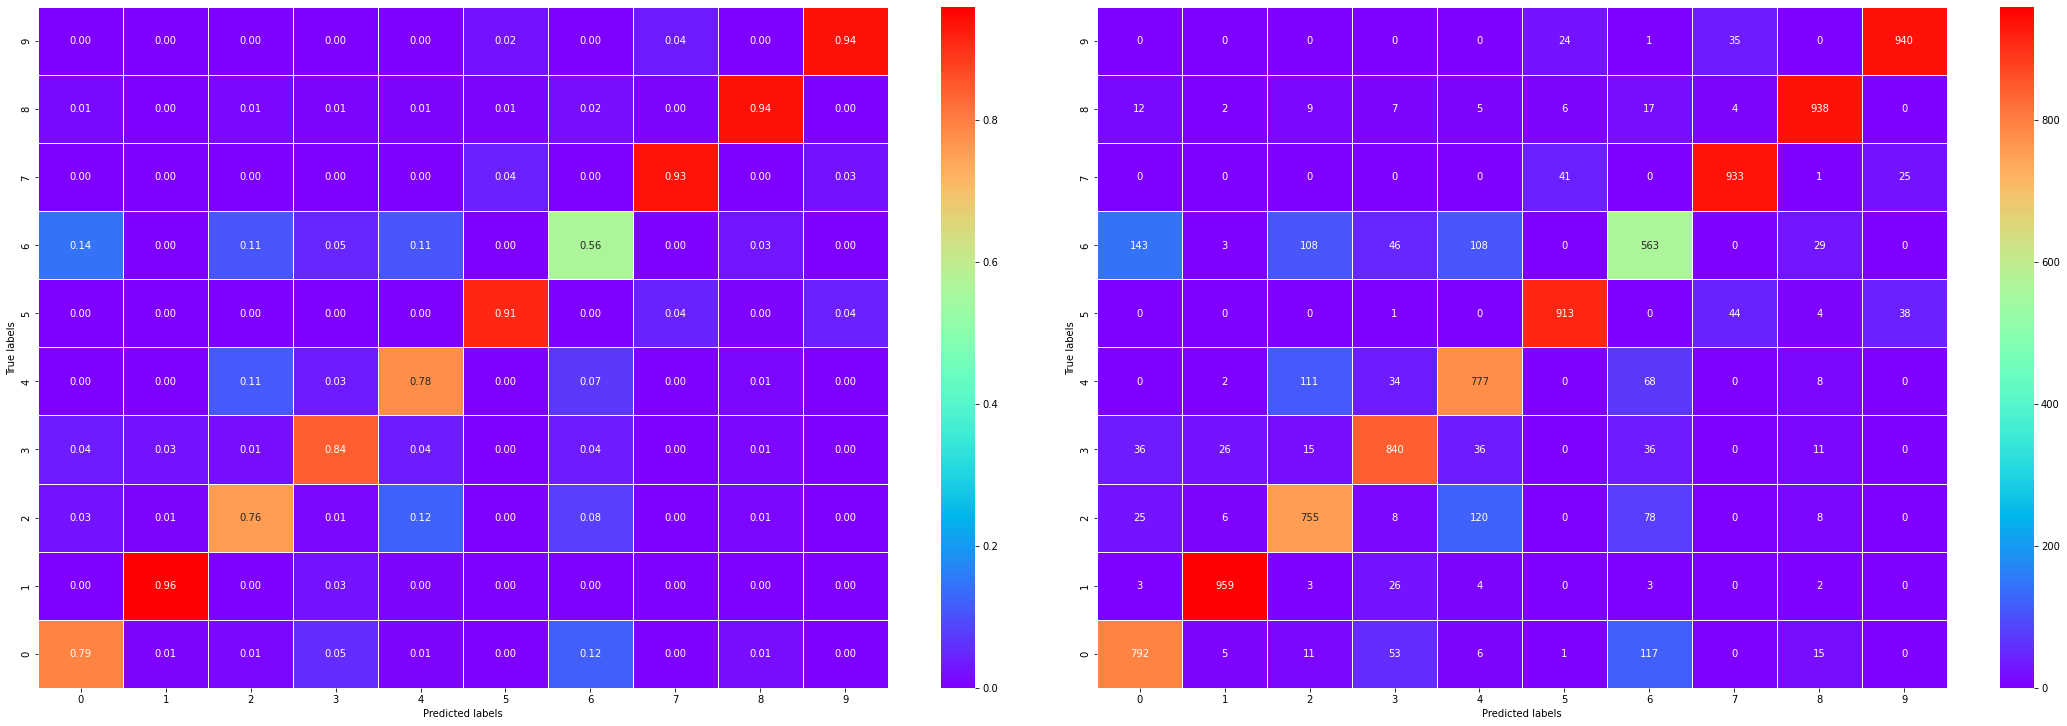

In [131]:
# fasionmnist
pca = PCA(n_components=500)   # Max Componenet values = 728
fasionmnist_pca_dimentional_train = pca.fit_transform(fasionmnist_train_image)
fasionmnist_pca_dimentional_test = pca.fit_transform(fasionmnist_test_image)
trainN(OneVsOneClassifier(LogisticRegression()), fasionmnist_train_image, fasionmnist_train_label,fasionmnist_test_image, fasionmnist_test_label)

## LDA

In [132]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## 可视化数据变换

In [133]:
lda = LinearDiscriminantAnalysis()

result_lda = lda.fit(mnist_train_image,mnist_train_label).transform(mnist_train_image)

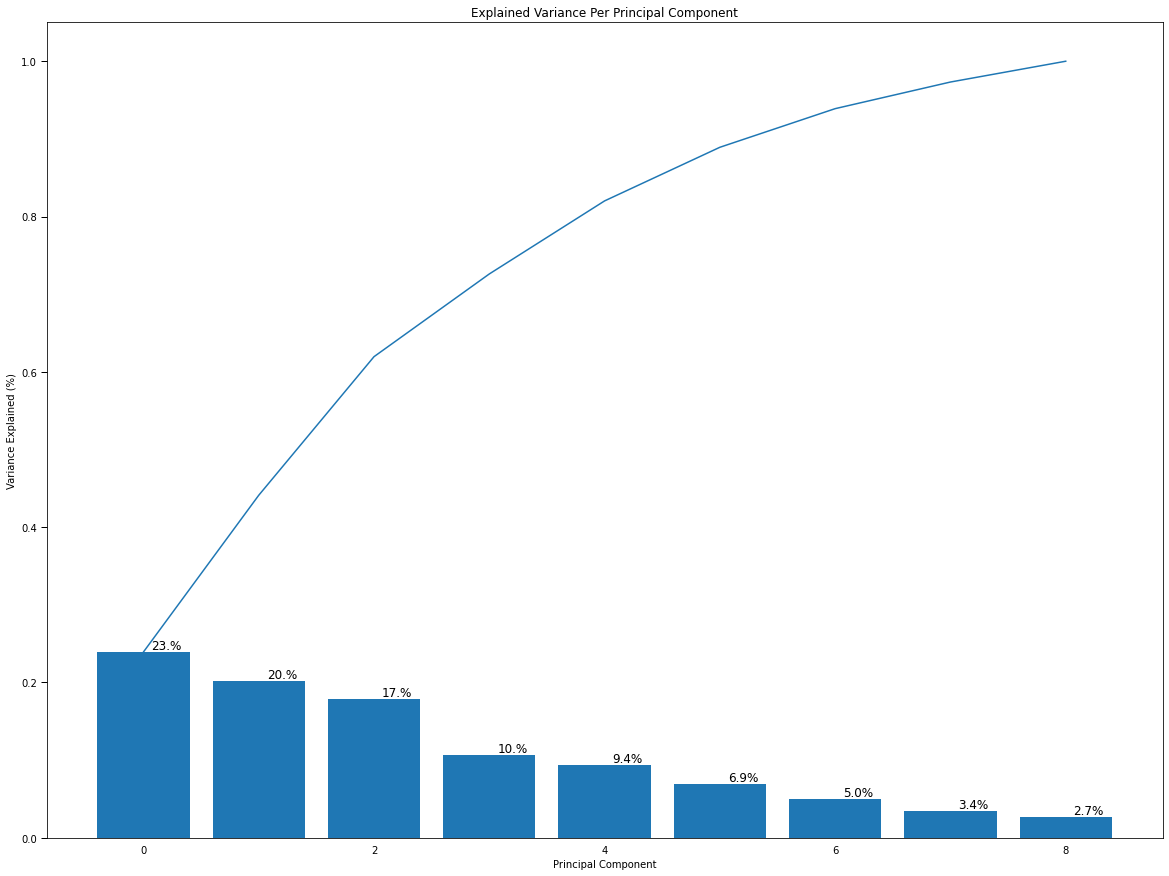

In [134]:
scree_plot(lda)

(9, 784)
(60000, 9)


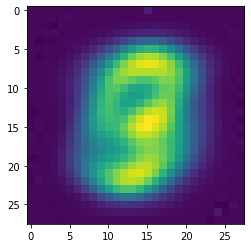

In [135]:
from sklearn.utils.validation import check_is_fitted
from sklearn.utils import check_array, check_X_y

def inverse_transform(lda, x):
    if lda.solver == 'lsqr':
        raise NotImplementedError("(inverse) transform not implemented for 'lsqr' "
                                  "solver (use 'svd' or 'eigen').")
    check_is_fitted(lda, ['xbar_', 'scalings_'], all_or_any=any)
    
    inv = np.linalg.pinv(lda.scalings_)
   
    print(inv.shape)
    x = check_array(x)
    print(x.shape)
    if lda.solver == 'svd':
        x_back = np.dot(x, inv) + lda.xbar_
    elif lda.solver == 'eigen':
        x_back = np.dot(x, inv)

    return x_back

apprx_lda = inverse_transform(lda,result_lda)
plt.imshow(apprx_lda[5].reshape(28,28))

# 训练评估

In [136]:
lda = LinearDiscriminantAnalysis(n_components=8)   # Max Componenet values = 728
mnist_lda_dimentional_train = lda.fit(mnist_train_image,mnist_train_label).transform(mnist_train_image)
mnist_lda_dimentional_test = lda.fit(mnist_test_image,mnist_test_label).transform(mnist_test_image)


------------------------------------------------------------
Train starting.
Train finished.
Evaluate starting.
Train acc: 0.8936833333333334
Test acc: 0.8735
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       980
           1       0.93      0.81      0.87      1135
           2       0.90      0.90      0.90      1032
           3       0.88      0.90      0.89      1010
           4       0.91      0.90      0.90       982
           5       0.86      0.82      0.84       892
           6       0.91      0.94      0.93       958
           7       0.74      0.91      0.82      1028
           8       0.83      0.87      0.85       974
           9       0.86      0.81      0.84      1009

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000



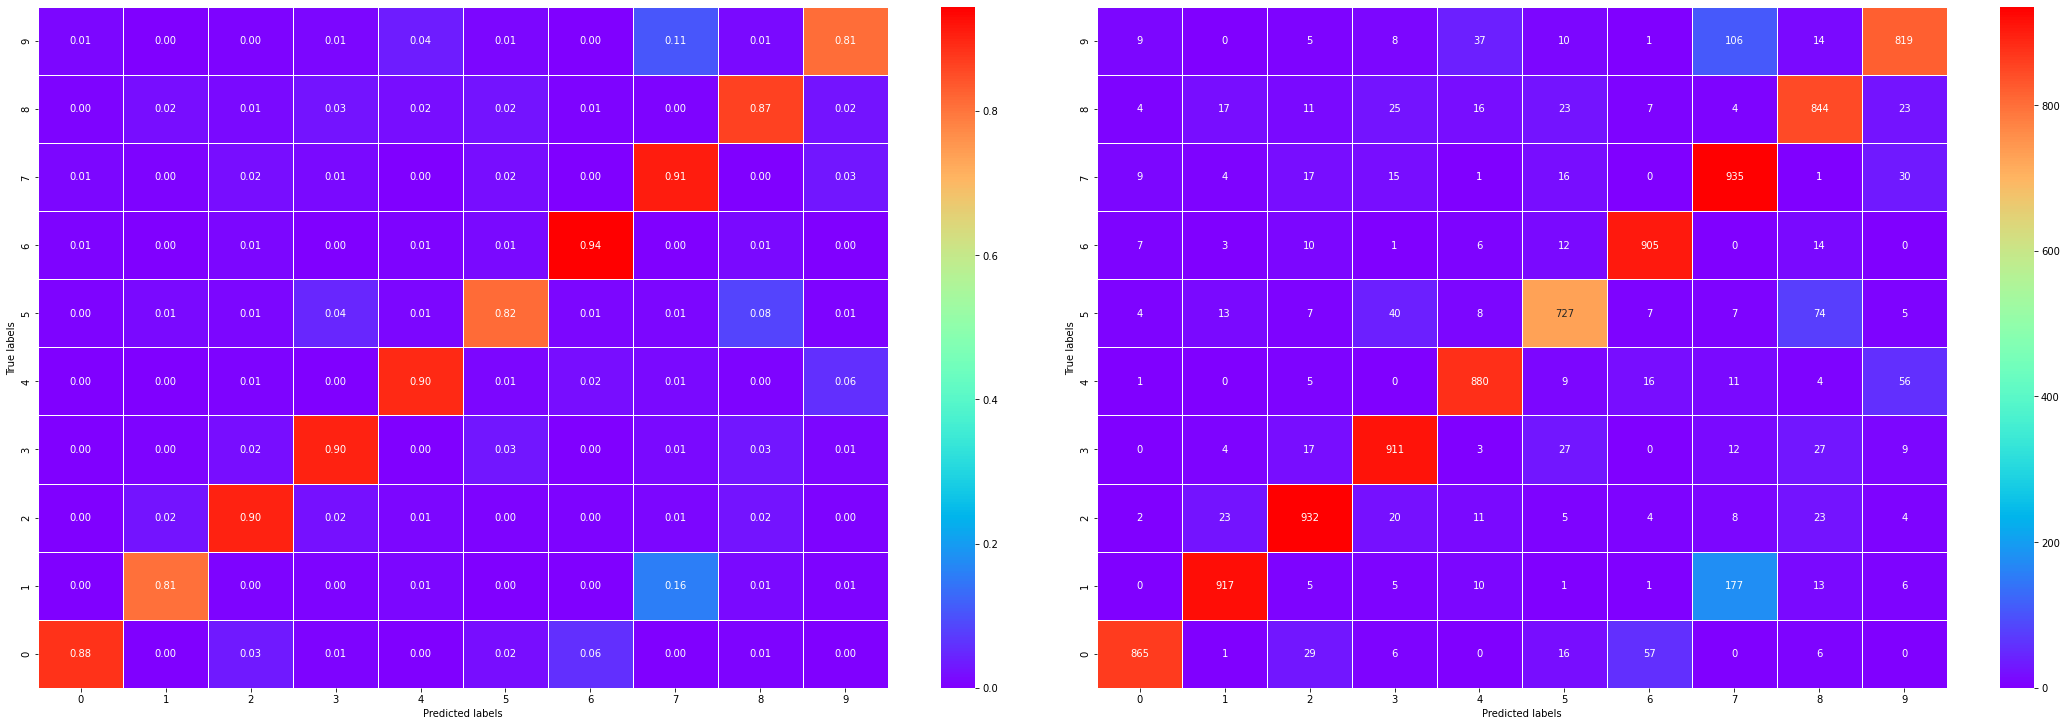

In [137]:
trainN(OneVsOneClassifier(LogisticRegression()), mnist_lda_dimentional_train, mnist_train_label, mnist_lda_dimentional_test, mnist_test_label)